# 08 Introducción a Redes Neuronales con PyTorch

- Definiciones básicas de PyTorch
- Representación de arquitecturas básicas

## Versión v.3

- Versión 19/07/2024

    - Conceptos básicos de Redes neuronales
    - Redes neuronales en PyTorch
    - Estructurado: Ejemplo clase
    - Functiones custom
    - Ver Red

- Versión 24/07/2024
    - Agregadas mini tareas de numpy con códigos con errores.

El notebook lo puedo modificar, esta versión es la v.3 a 24/07/2024 a las 2pm de Caracas.

## Aprendizaje Automático [UCV]


* Autor: Fernando Crema García
* Contacto: fernando.cremagarcia@kuleuven.be; fernando.cremagarcia@esat.kuleuven.be

---

In [ ]:
# code

# Screenshots

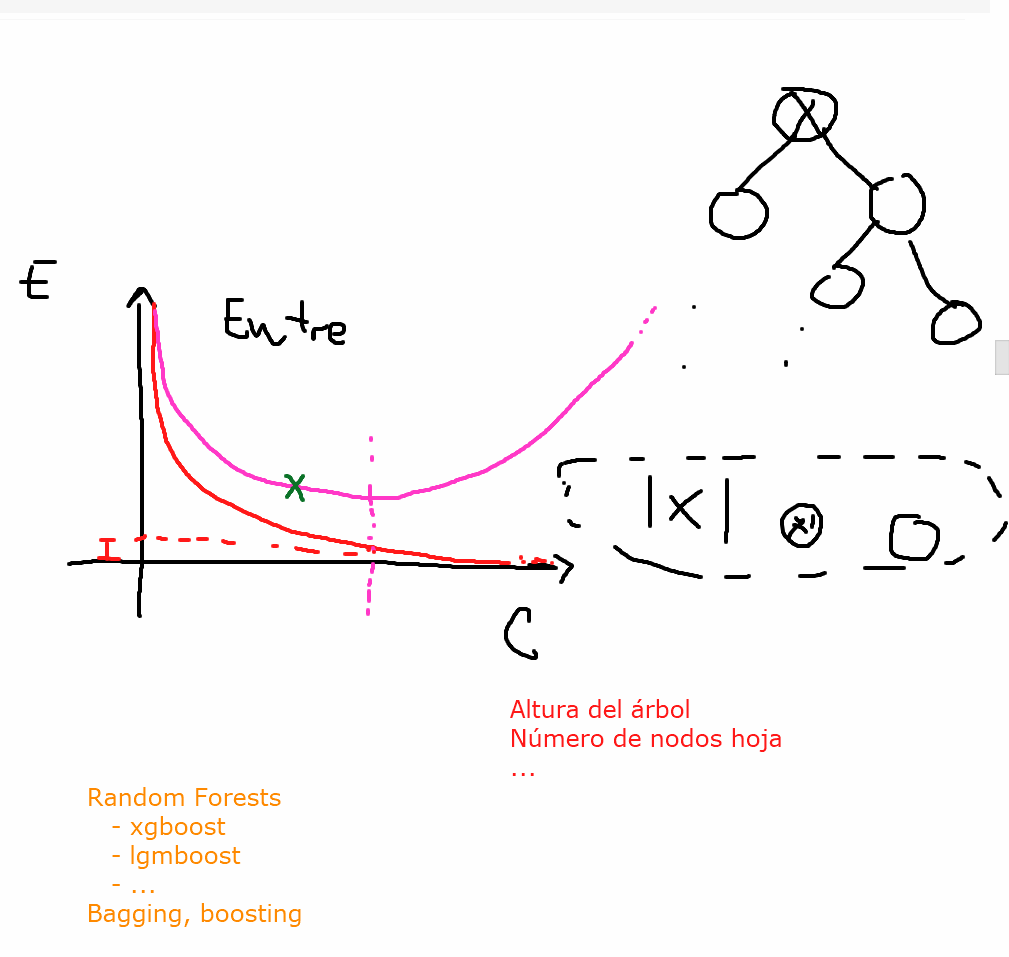

# code

In [ ]:
# Función para cargar SVG's basados en https://udlbook.github.io/udlbook/

from IPython.display import SVG, display

def show_svg(img):
  display(SVG(url=f'https://raw.githubusercontent.com/ucvia/ml-site/gh-pages/static/Chap03/{img}.svg'))

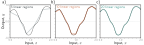

In [ ]:
show_svg('ShallowApproximate')

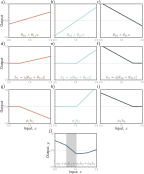

In [ ]:
show_svg('ShallowBuildUp')

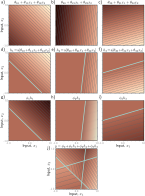

In [ ]:
show_svg('ShallowBuildUp2D')

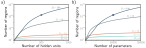

In [ ]:
show_svg('ShallowRegions')

# Introducción


## Aprendizaje supervisado: hasta ahora

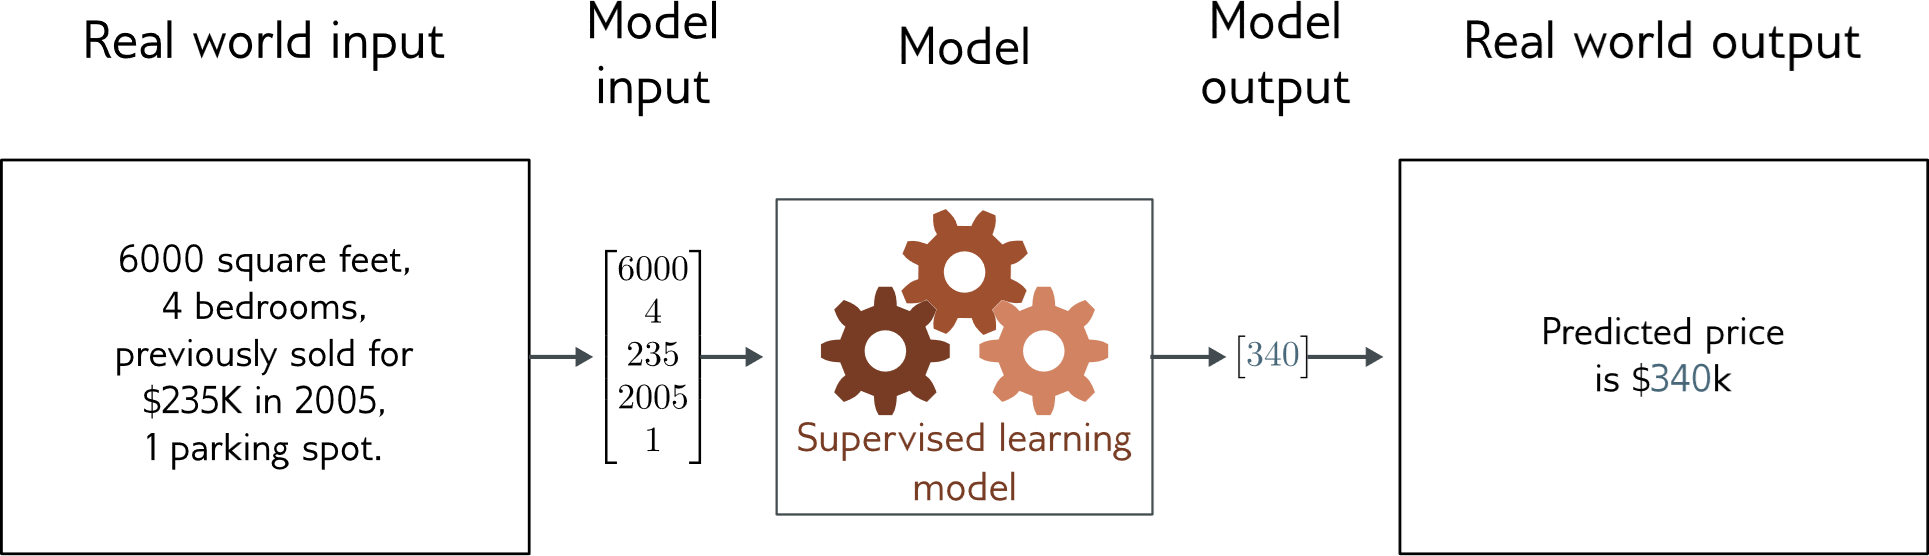

### Regresión

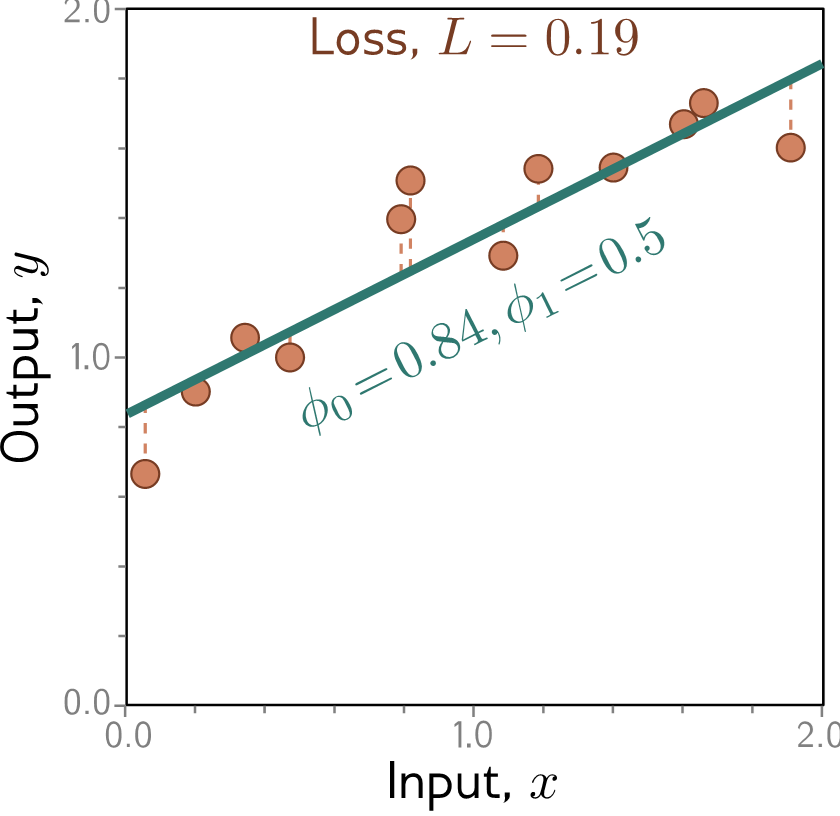

### Método del descenso del gradiente

A veces es complicado obtener la solución analítica

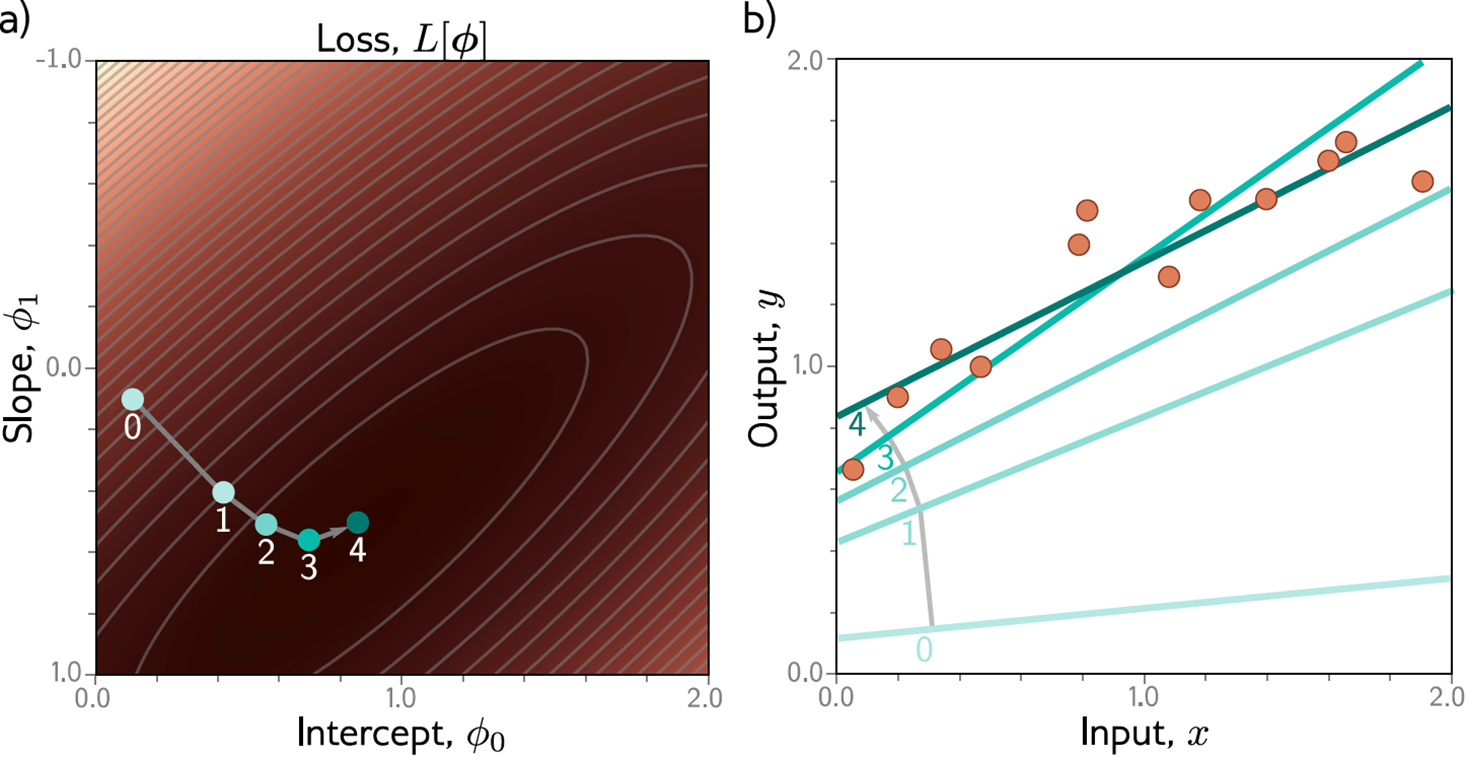

# Redes neuronales poco profundas

El modelo de regresión es obviamente limitado
  - Desea poder describir entradas/salidas que no necesariamente tengan una relación lineal
  - Deseamos múltiples entradas (regresión lineal con múltiples dimensiones)
  - Deseamos varias salidas (complicado)

Qué queremos?
  - Suficientemente flexible para describir asignaciones de entrada/salida arbitrariamente complejas.
  - Podemos tener tantas entradas como queramos
  - Podemos tener tantas salidas como queramos


## Learning by example: Red poco profunda

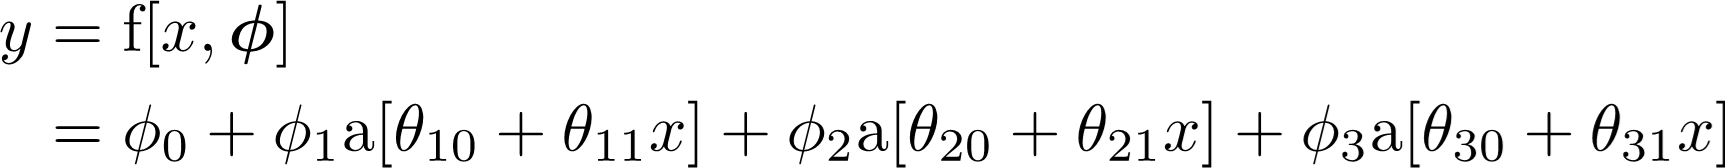

Dónde tenemos que Unidad lineal rectificada (ReLU)

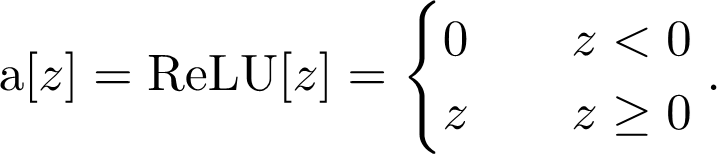

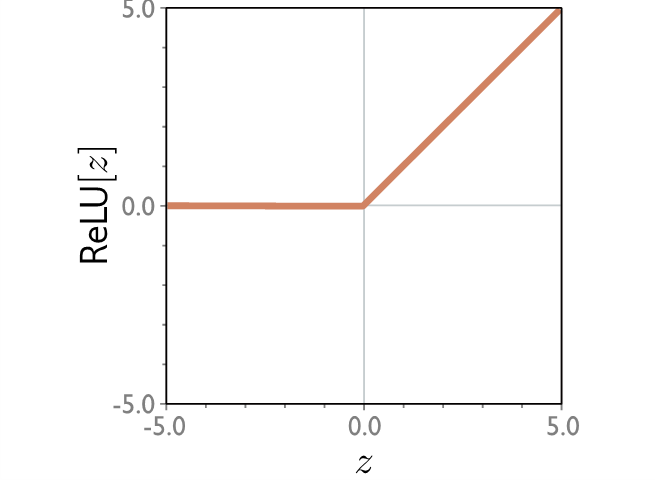

### Parámetros

Cuántos parámetros tenemos ahora?

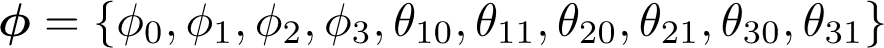


## Familia de funciones

Cuando definimos (le damos un nombre) a la función $a$ trae como consecuencia que:

- Representamos una familia de funciones
- Los parámetros (luego de optimizarlos) determinan una función concreta
- Dados los parámetros se puede realizar la inferencia (ejecutar la ecuación)

Qué necesitaríamos?
- Conjunto de datos de entrenamiento
- Definir la función de pérdida (podemos todavía hacer mínimos cuadrados)
- Cambiar los parámetros para minimizar la función de pérdida


## Representación visual

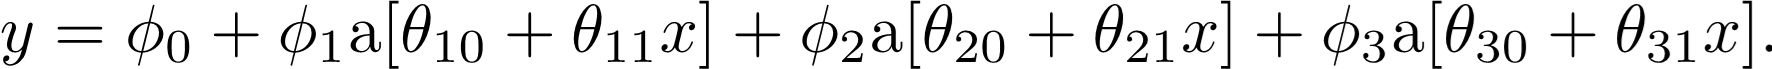

Usando ReLU simplemente estamos representando funciones lineales a trozos con tres articulaciones.


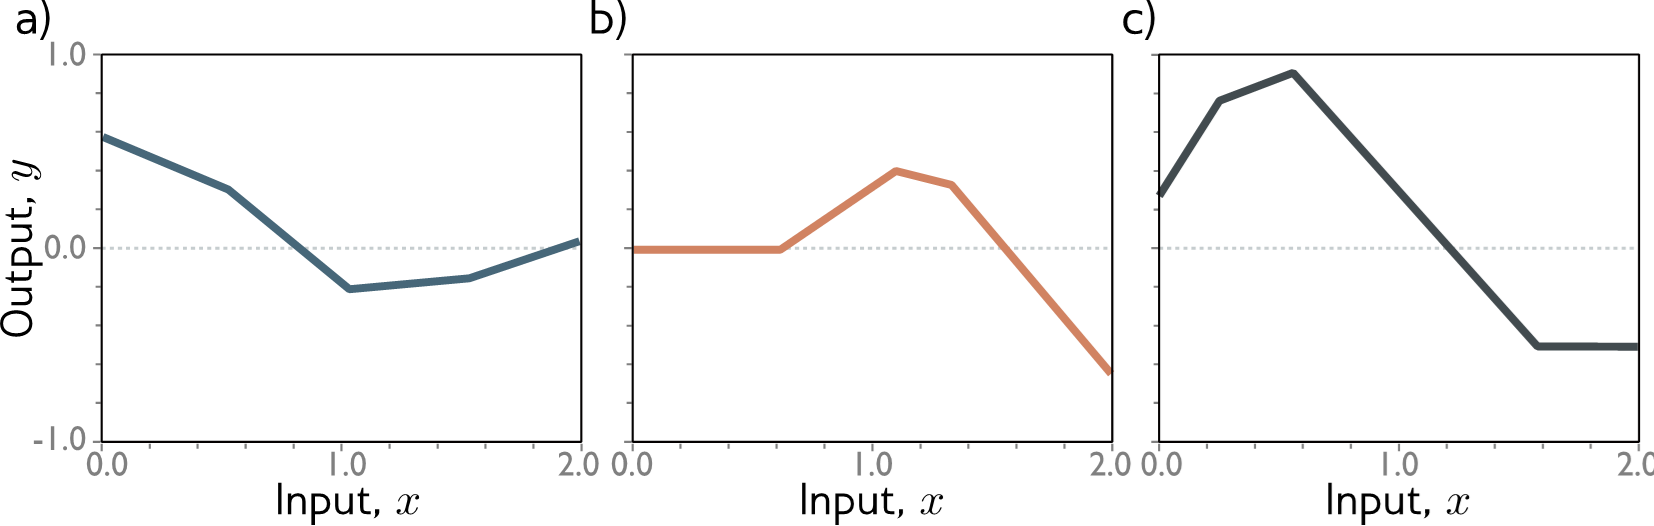

## Componentes de una red neuronal poco profunda


### Capa oculta

Podemos redefinir la red

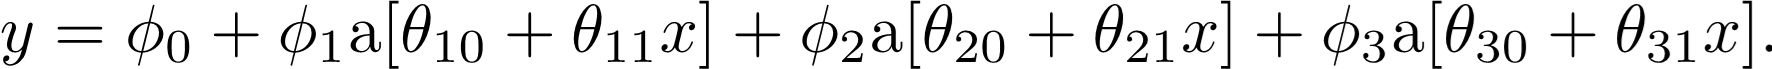

Como

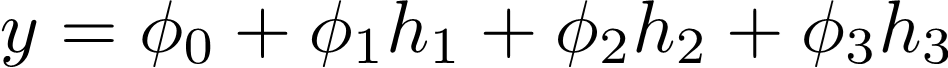

De donde juntas cada $h_i$ son conocidas como "capa oculta"

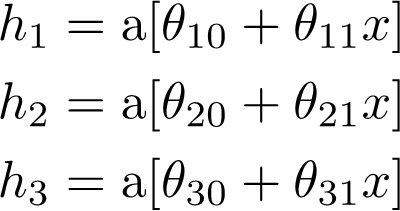

### Función de activación

Es la función $a$ que es aplicada luego de obtener los valores de $\theta_{i0} + \theta_{i1} x$. Existen muchos tipos de funciones de activación

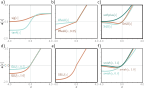

In [ ]:
show_svg('ShallowActivations')

### Neuronas

Son las unidades de nuestra red que representan tanto las entradas $x$ como las salidas $y$.

Además, cada componente de la cada oculta $h_i$ también puede ser considerada una neurona

## Reconstrucción visual de una red neuronal

### 1. Calculamos tres funciones lineales

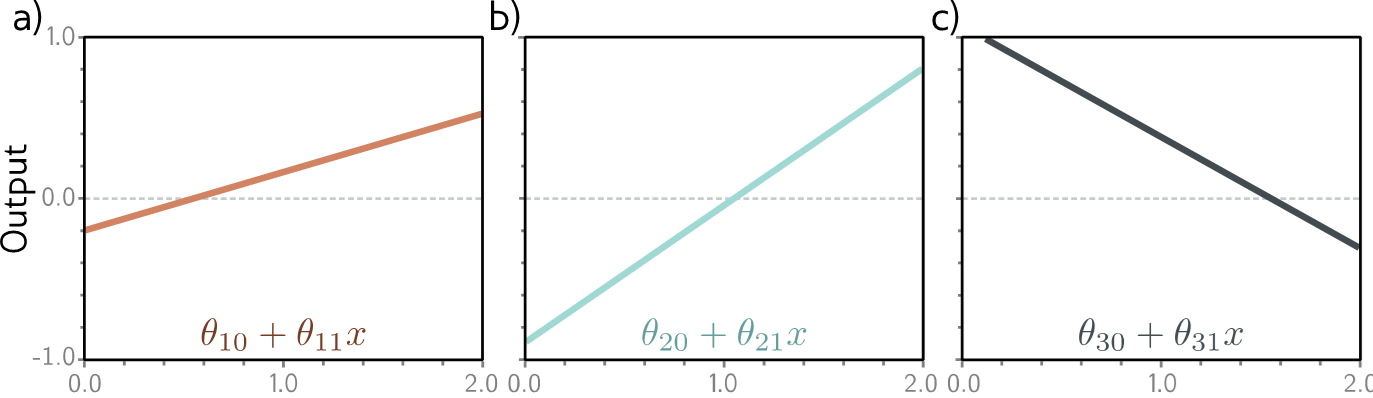

### 2. Ponderamos usando la función de activación

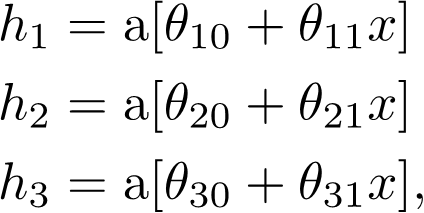

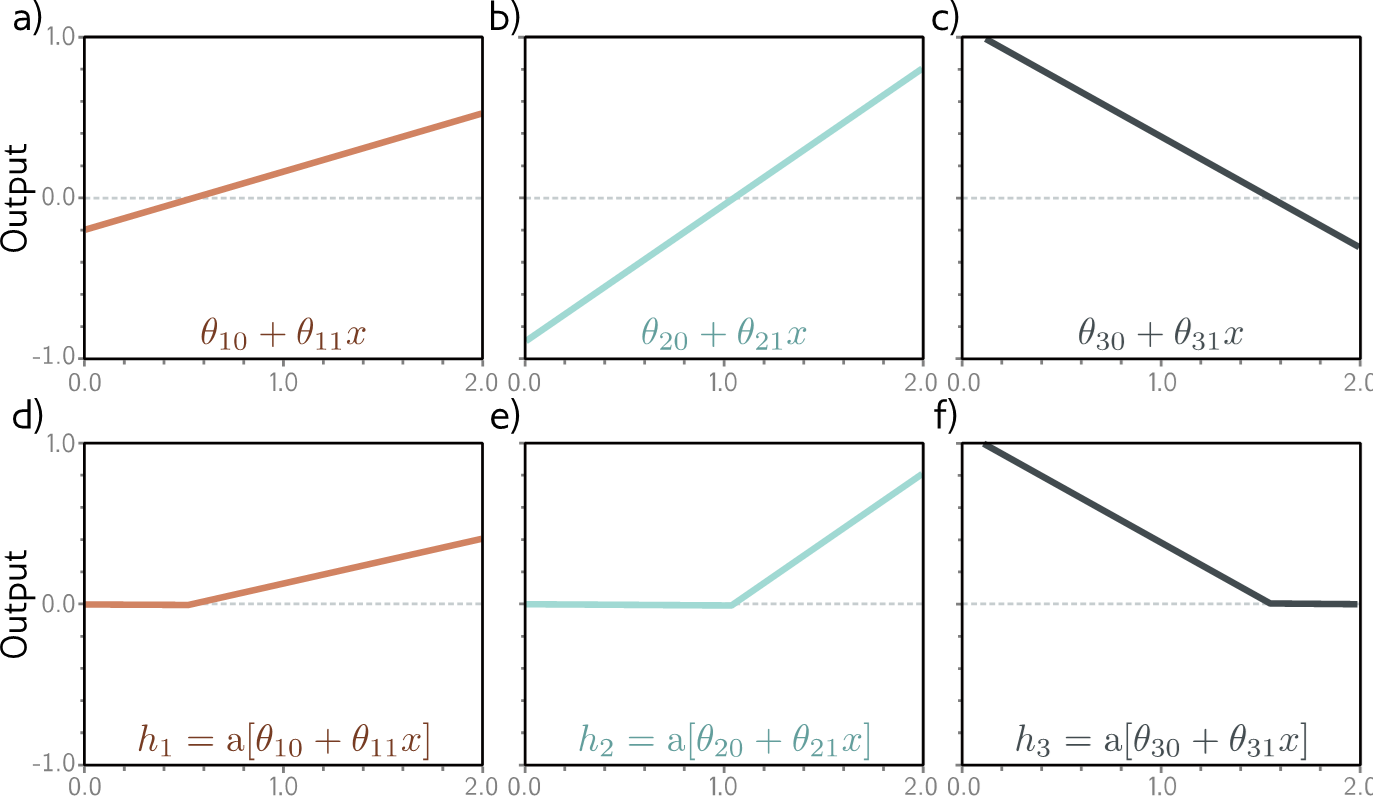

### 3. Multiplicamos cada neurona por su coeficiente

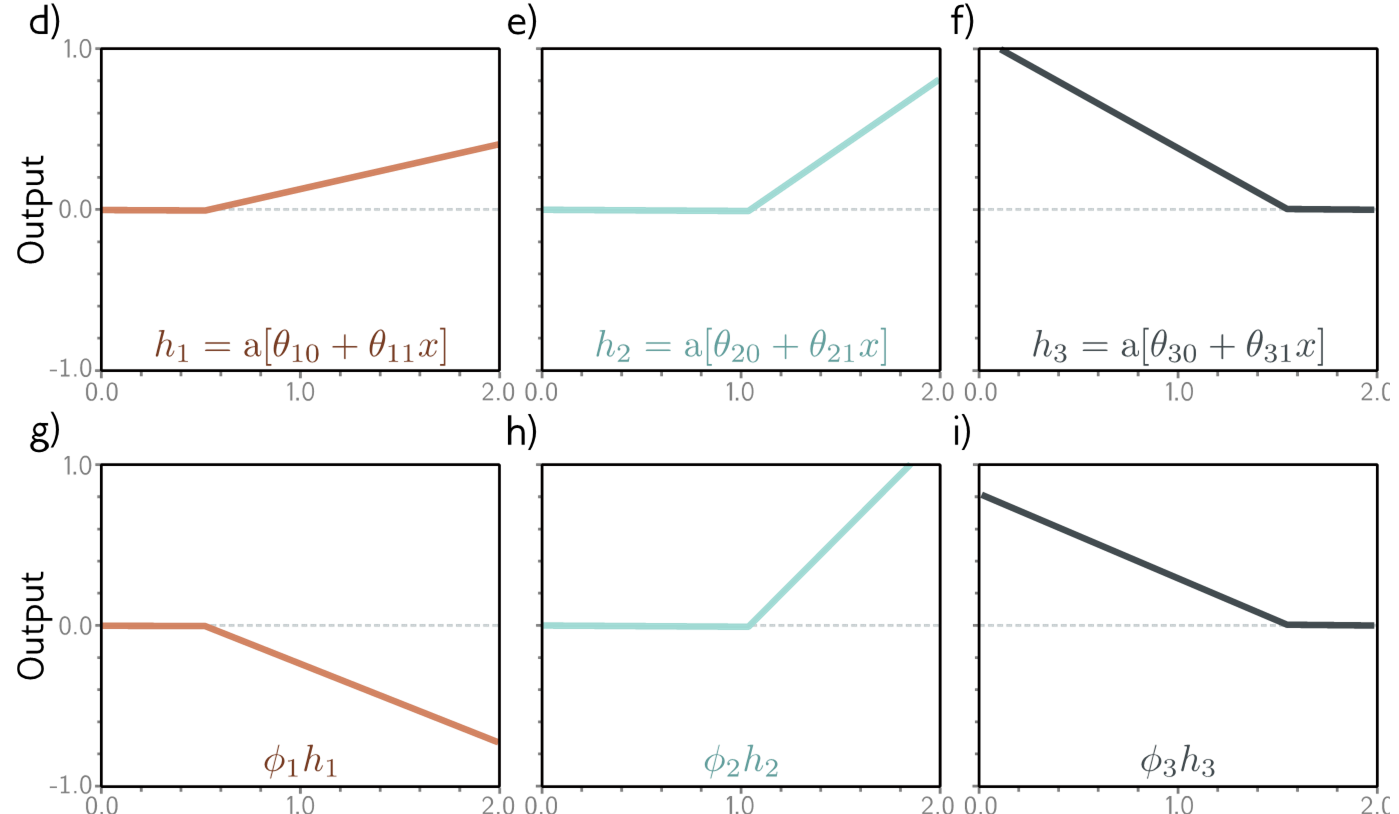

### 4. Aplicamos una combinación lineal de cada neurona




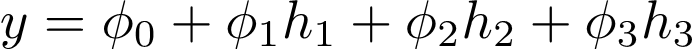

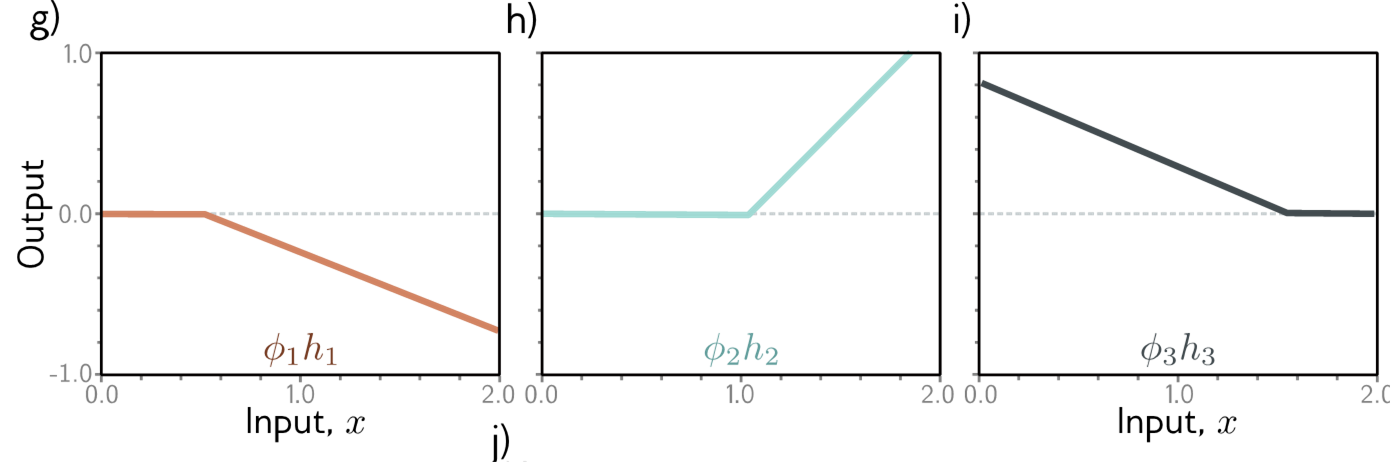

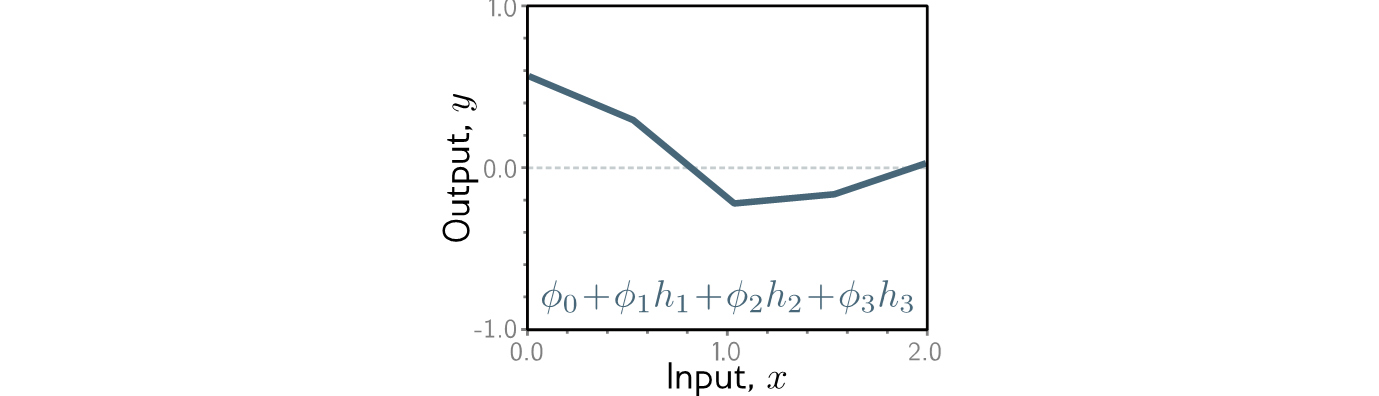

Fíjense que estamos reconstruyendo funciones a partir de combinaciones lineales de funciones de activación evaluadas en líneas.

### Analizando regiones sombreadas

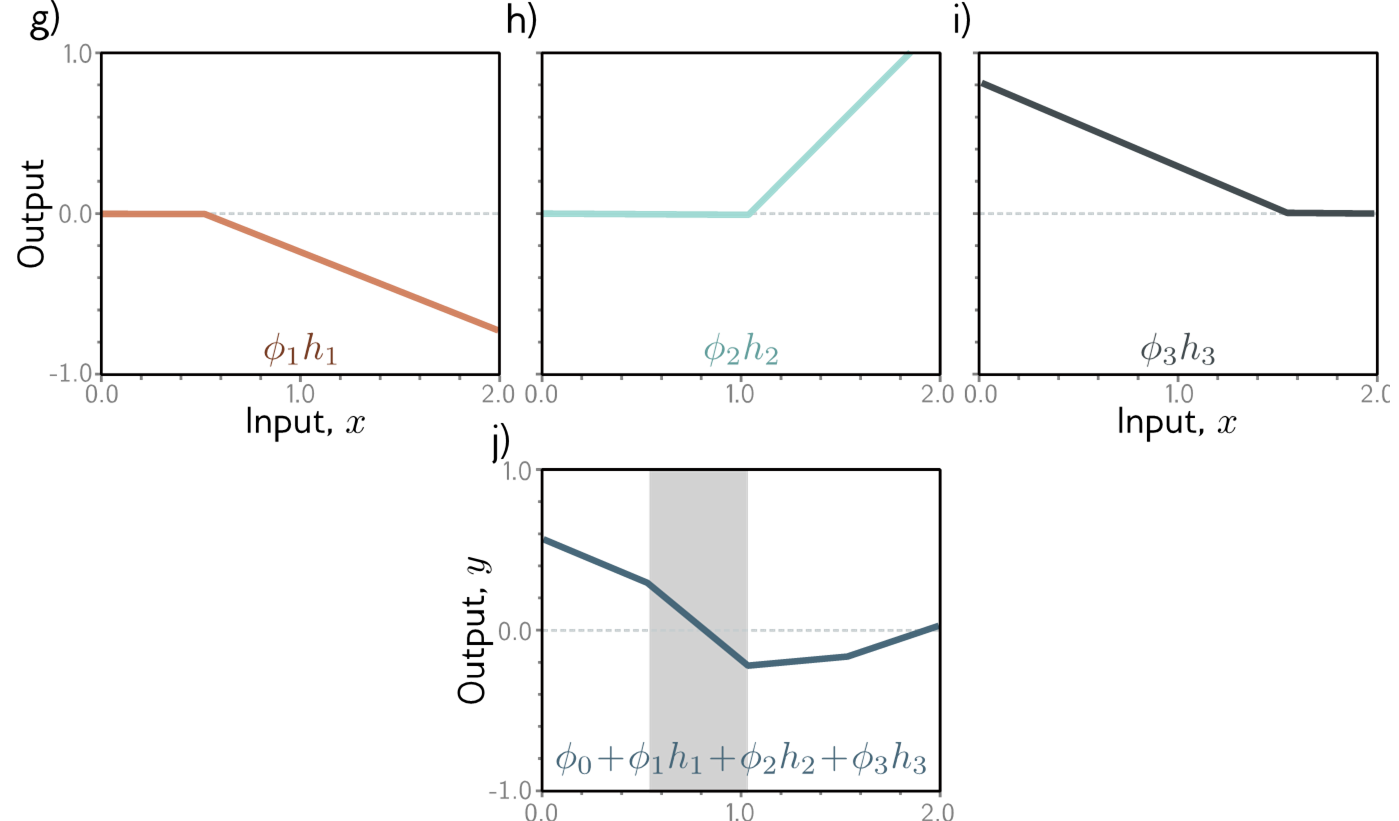

Fíjense cómo en la región sombreada:
1. Neurona 1 activa
1. Neurona 2 inactiva
1. Neurona 3 activa

Aún siendo un ejemplo bastante básico, es el principio del concepto de interpretabilidad en redes neuronales: analizar en ciertas zonas de la red cuándo ciertas neuronas están, o no, activadas.


## Representación visual de una red neuronal

Por ahora entendemos que estamos representando funciones pero cómo podemos representar, visualmente, la red neuronal?

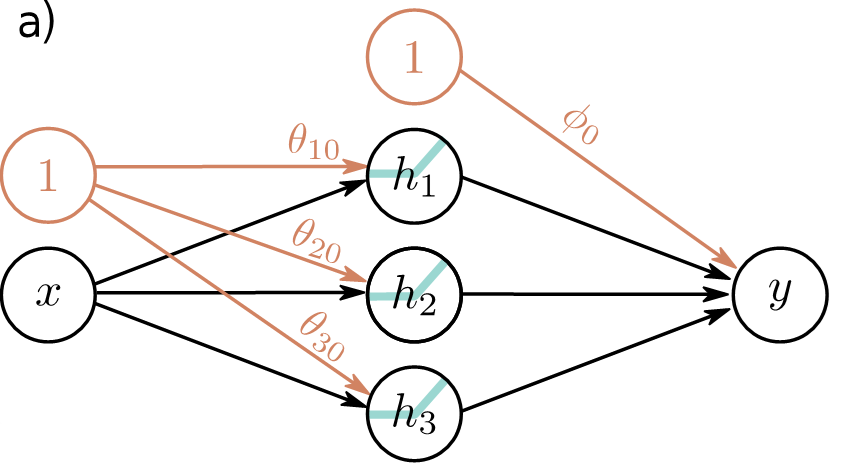

### Cómo leer esto?

1. Cada flecha representa **coeficientes** de nuestro modelo.
1. Cada $neurona$ es representada por una circunferencia. Dentro de la neurona, tenemos las $variables$ asociadas.
    - Si la neurona está a la izquierda es la representación de la **entrada** $x$
    - Si la neurona está a la derecha es la **salida** $y$
    - Si la neurona es interna representamos las **neuronas ocultas** por cada **capa oculta**
1. Toda neurona multiplica a su coeficiente.
1. Toda neurona suma las flechas de entradas que van hacia ella.
1. En resumen: Cada parámetro multiplica su fuente y se suma a su objetivo
1. Para agregar el **sesgo** de cada función lineal, basta con agregar 1 unidad con la unidad $1$ por cada capa.


### Representación sin sesgos

Sin embargo, normalmente vamos a ver representaciones de redes sin sesgos

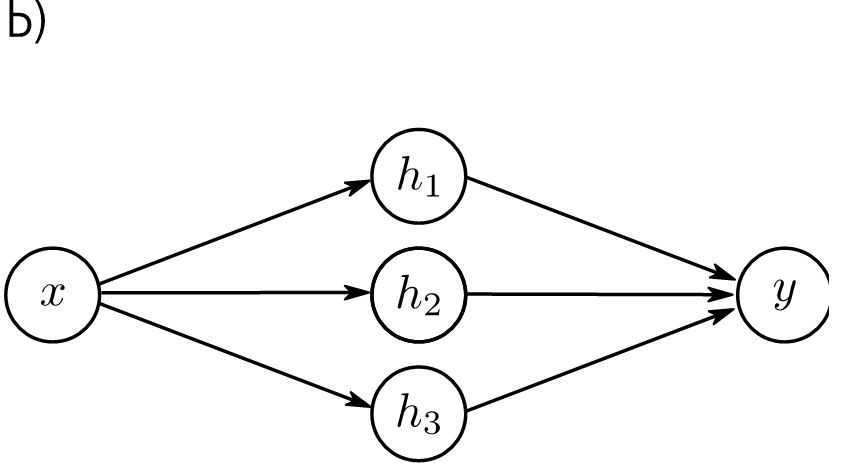

## Por qué usar redes neuronales?

Fíjense que tenemos, por ahora, ejemplos con solo 3 neuronas en la capa oculta.

Es claro, usando ReLU, que cada neurona representa una región lineal.

Imaginen que usamos 5, 10 y 20 regiones lineales


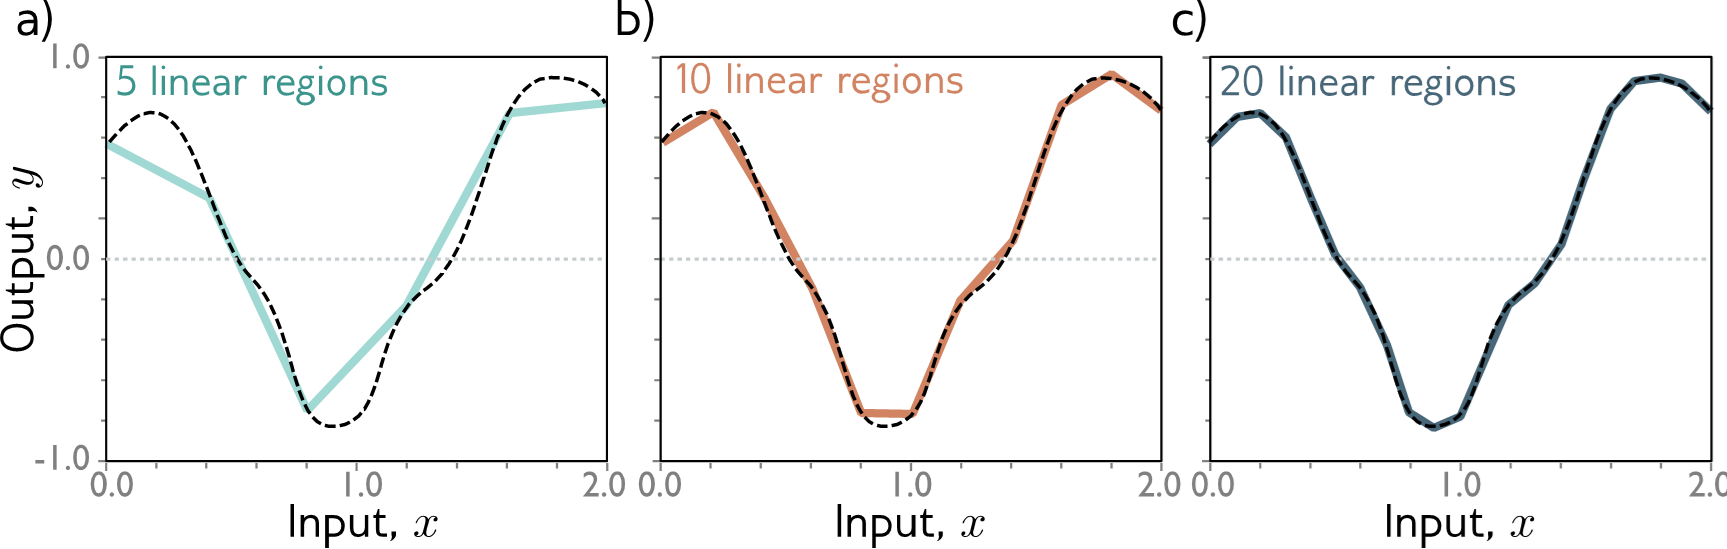

Esto, matemáticamente, sería:

$y=\phi_0+\phi_1 h_1+\phi_2 h_2+\phi_3 h_3+\phi_4 h_4+\phi_5 h_5$ para el primer caso

Para los casos 2 y 3 resulta tedioso escribir la función. Por ello, podemos generalizar y definir como $D$ el número de neuronas en la capa oculta. Para neurona, tenemos $$h_d=\mathrm{a}\left[\theta_{d 0}+\theta_{d 1} x\right]$$ y en consecuencia podemos definir la capa oculta como $$y=\phi_0+\sum_{d=1}^D \phi_d h_d $$

### Teorema de aproximación universal

Intuitivamente estamos viendo que al aumentar $D$, pareciera que la aproximación de $f$ es mejor.

No solo es mejor sino que podemos probar que, con suficientes unidades ocultas, una red neuronal superficial puede describir **cualquier función continua** en un **subconjunto compacto** de con una **precisión arbitraria**

Hay un sin fin de teoremas de aproximación dependiendo de muchas hipótesis. Para profundizar más pueden leer _Multilayer feedforward networks are universal approximator 1989. Hornik et. al._ disponible en la sección [Referencias](https://ml.ucv.ai/referencias/)

#### De qué nos sirve este teorema?

Básicamente podemos aproximar cualquier función continua dependiendo de cuántas neuronas agreguemos dada una función de activación.

## Modificando la estructura de nuestra red

Es trivial extender la idea con una sola salida agregando una dimensión nueva:

Imaginen que tenemos 4 neuronas en la capa oculta

\begin{aligned}
h_1 & =\mathrm{a}\left[\theta_{10}+\theta_{11} x\right] \\
h_2 & =\mathrm{a}\left[\theta_{20}+\theta_{21} x\right] \\
h_3 & =\mathrm{a}\left[\theta_{30}+\theta_{31} x\right] \\
h_4 & =\mathrm{a}\left[\theta_{40}+\theta_{41} x\right]
\end{aligned}


Para agregar una salida extra, es decir, $f: \mathbb{R} \rightarrow \mathbb{R}^2$

\begin{aligned}
& y_1=\phi_{10}+\phi_{11} h_1+\phi_{12} h_2+\phi_{13} h_3+\phi_{14} h_4 \\
& y_2=\phi_{20}+\phi_{21} h_1+\phi_{22} h_2+\phi_{23} h_3+\phi_{24} h_4
\end{aligned}

### Red con salida extra

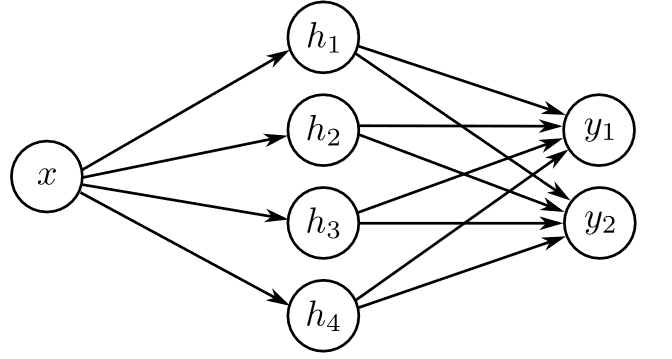

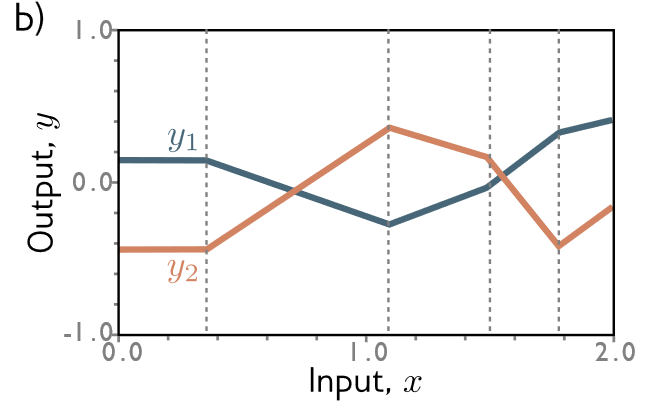

### Red con entrada extra

Pero podemos extender la idea a la entrada?

Por ejemplo: $f: \mathbb{R}^2 \rightarrow \mathbb{R}$

Si!



Para cada neurona ocultas tendríamos

\begin{aligned}
& h_1=\mathrm{a}\left[\theta_{10}+\theta_{11} x_1+\theta_{12} x_2\right] \\
& h_2=\mathrm{a}\left[\theta_{20}+\theta_{21} x_1+\theta_{22} x_2\right] \\
& h_3=\mathrm{a}\left[\theta_{30}+\theta_{31} x_1+\theta_{32} x_2\right]
\end{aligned}

Y para obtener la salida $y$ increíblemente (o no ) es idéntico: $$y=\phi_0+\phi_1 h_1+\phi_2 h_2+\phi_3 h_3$$

Gráficamente esto es

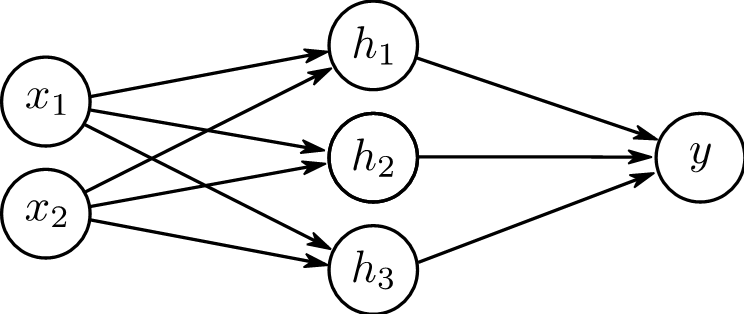

## Representación gráfica con más de una entrada

Imaginemos dos hiperplanos dados como: $$2 x_1 + 3 x_2 -5 = a \; \text{ y } \; 1 x_1 + 3 x_2 -5 = b$$ vistos por encima del eje de la salida y (perpendicular al eje no importa el valor de $f(x_1, x_2)$

Fijemos, como ejemplo, $a = b = 0$

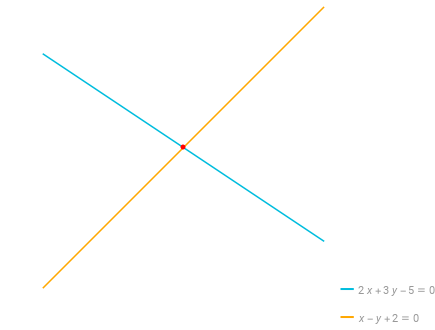

Agreguemos dos hiperplanos para el ejemplo $2 x + 3 y -5 = a$ con $a = -1$ y $a = 1$

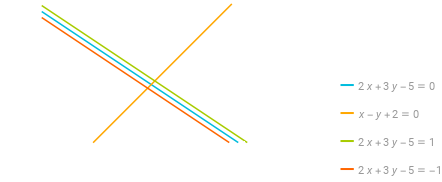

Para ambos "generadores" podemos "barrer" los posibles valores de $f(x_1, x_2)$

### Ejemplo con tres neuronas ocultas

Imaginemos ahora que tenemos nuestra red con tres neuronas ocultas. La representación sería, por ejemplo:



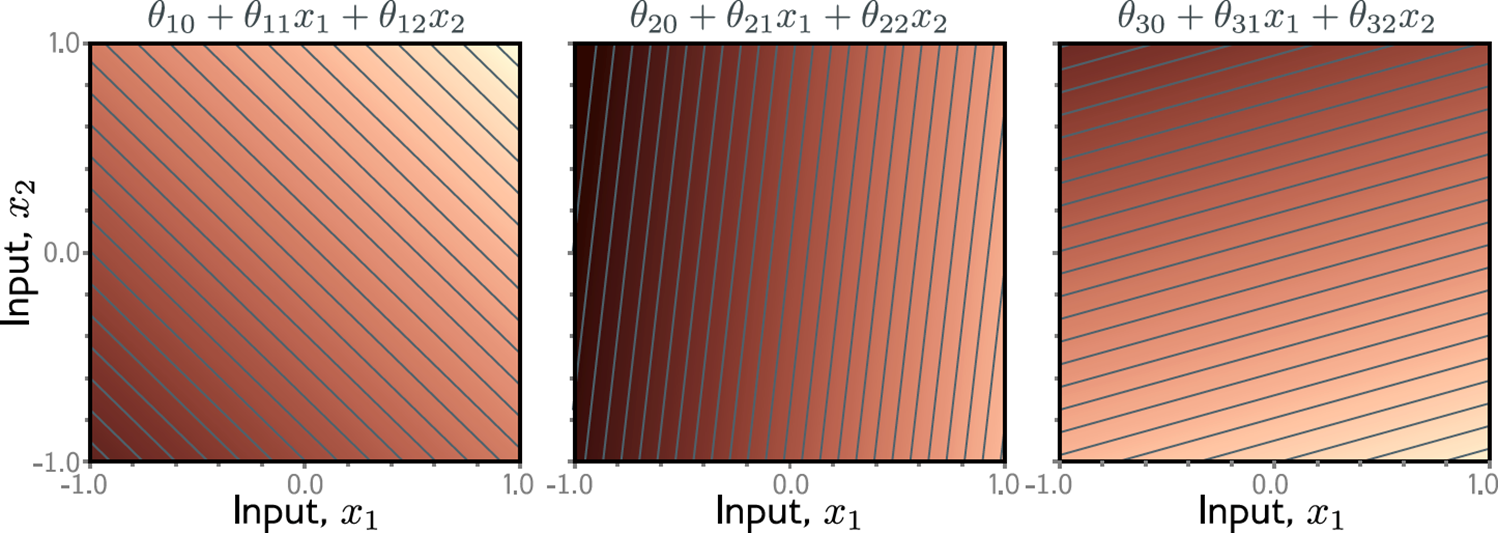

Aplicando la función ReLU

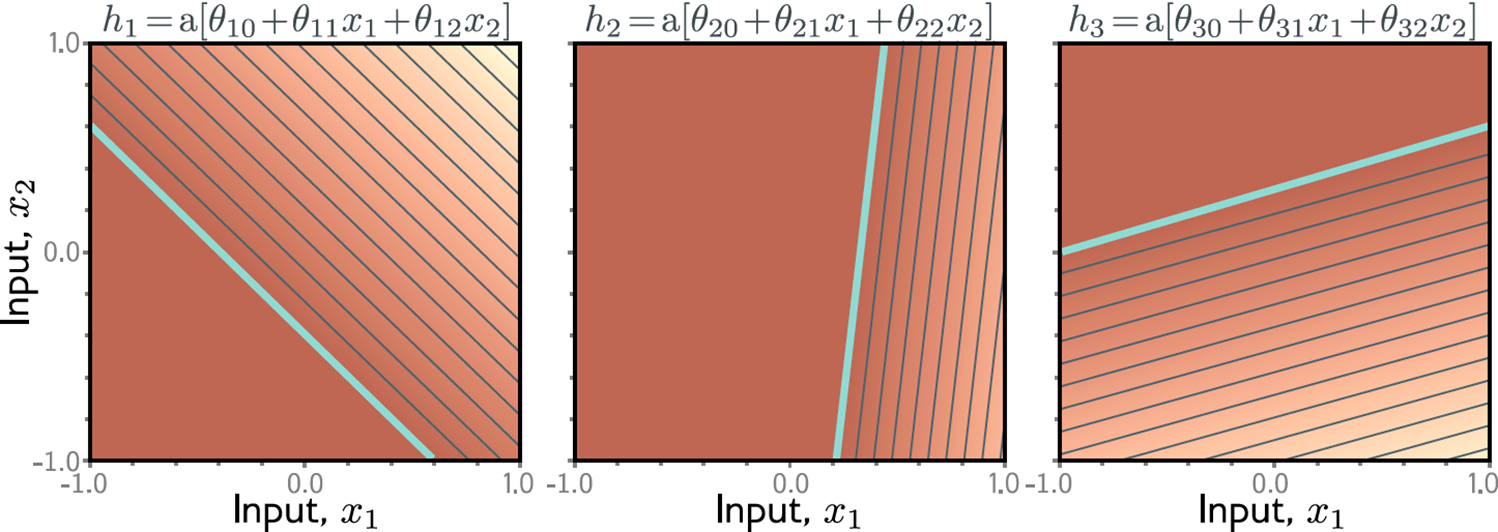

Multiplicar por el coeficiente asociado


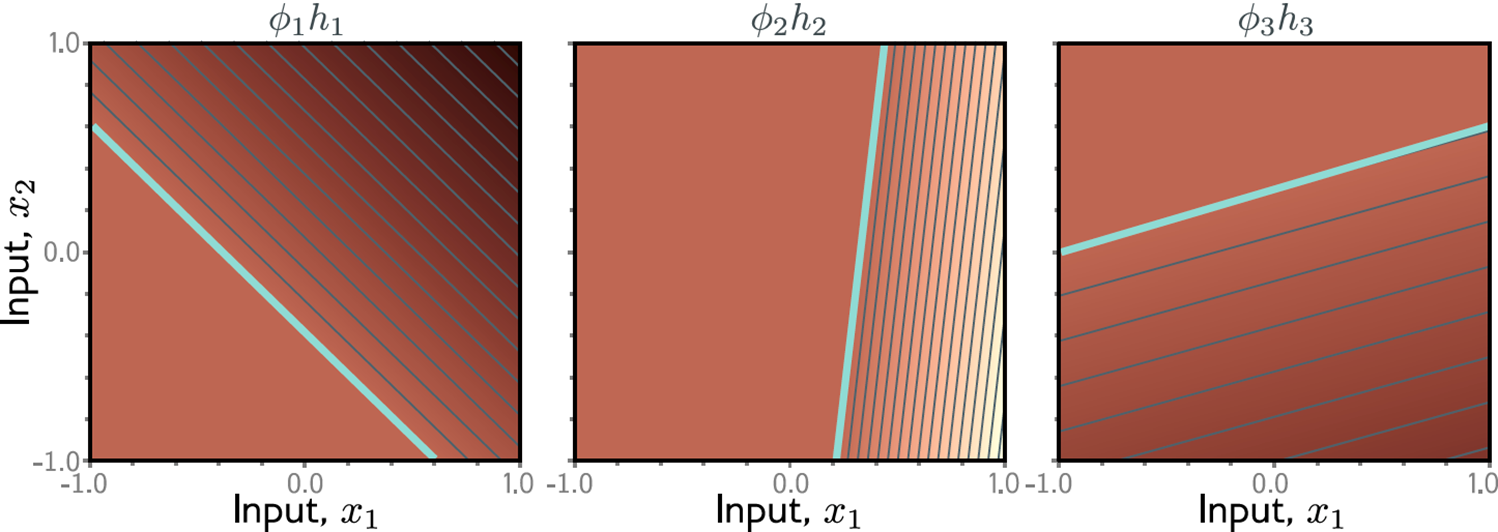

Finalmente, hacer la combinación lineal:



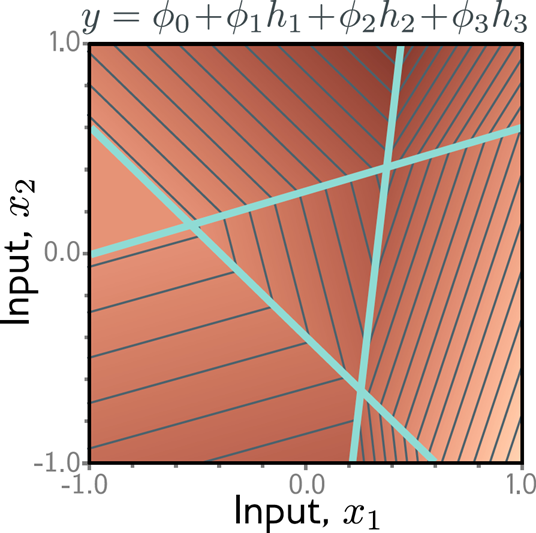

En resumen, agregando el valor de la función tendríamos algo como:

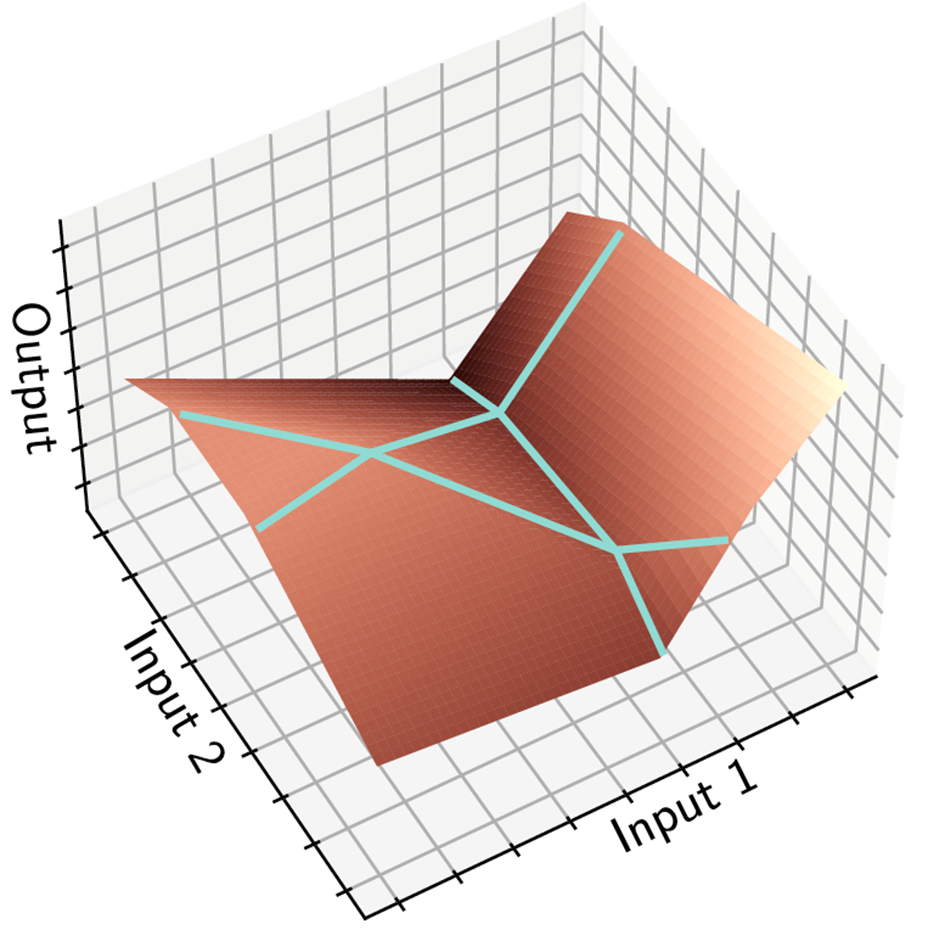

Bastante interesante sería fijar cada dimensión de entrada $x_i$ en el eje X y revisar el valor de $y$

## Redes neuronales no profundas con entradas, unidades y salidas arbitrarias

Una vez que entendemos todos los componentes es fácil generalizar nuestra definición con dimensiones completamente arbitrarias.

Sean:

1. $D_i$ la dimensión del dominio de nuestra función $f$
1. $D_o$ la dimensión del rango de nuestra función $f$
1. $D$ el número de unidades ocultas.
1. $a$ una función de activación.

Es decir: $$f: \mathbb{R}^{D_i} \rightarrow \mathbb{R}^{D_o}$$

Tenemos:

$$
h_d=\mathrm{a}\left[\theta_{d 0}+\sum_{i=1}^{D_i} \theta_{d i} x_i\right] \text{ para cada neurona } d \in \{1, \dots, D\} \;\; \text{ para cada input }  x \in \mathbb{R}^{D_i}   
$$

$$ y_j=\phi_{j 0}+\sum_{d=1}^D \phi_{j d} h_d \;\; \text{ para cada output }  y \in \mathbb{R}^{D_o}    
$$


## Regiones de interés

Usando ReLU es fácil demostrar que cada salida consiste en un politopo convexo $D$ dimensional

Con dos entradas, tres salidas tenemos siete polígonos:

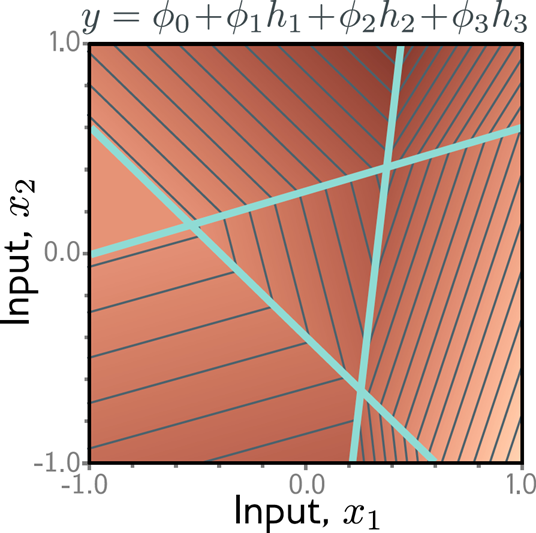


### Número de regiones de interés

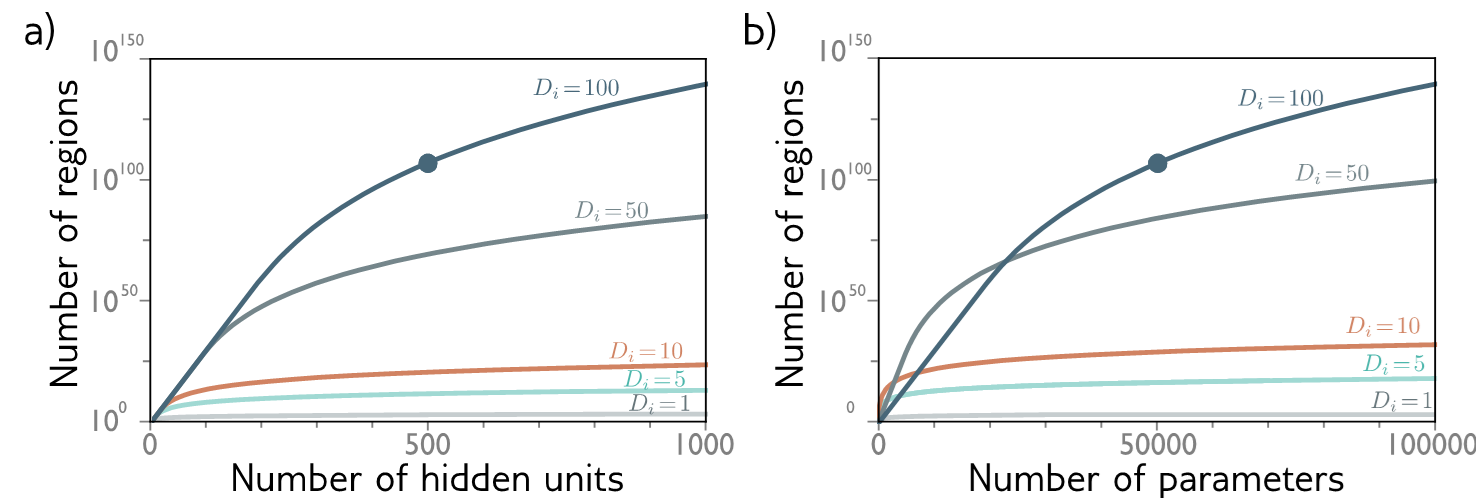

- El números de regiones creadas por $D>D_i$ planos en $D_i$ dimensiones fue provado por Zaslavsky en (1975) y es:
$$
\sum_{j=0}^{D_i}\binom{D}{j} \longleftarrow \text { Coeficientes binomiales }
$$
- Qué tan grande es? Es más grande que $2^{D i}$ pero menor a $2^D$.

## Resumen de la nomenclatura

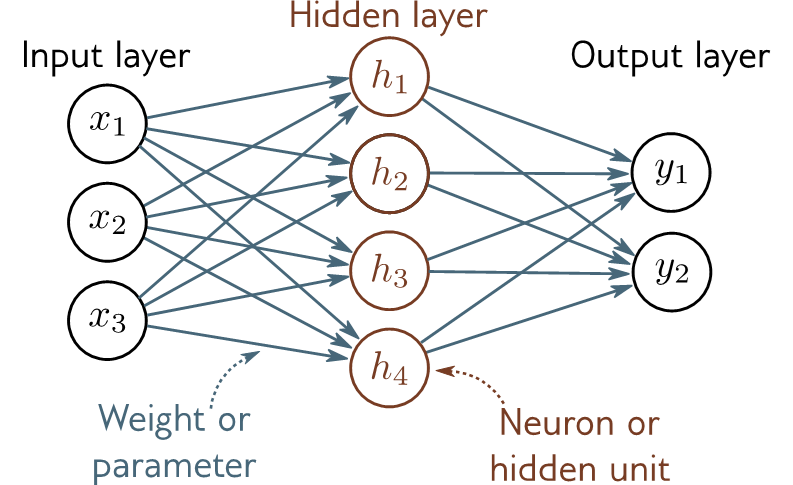

### Matemática/Matemáticas discretas -> Aprendizaje automático

- Puntos de corte (_Y-offsets_) = sesgos (_biases_)
- Pendientes (_Slopes_) = pesos (_weights_)
- Todos los pesos disponibles (_Everything in one layer connected to everything in the next_) = Redes totalmente conectadas (_fully connected network_)
-  Sin ciclos (_No loops_) = Redes de alimentación directa (_feedforward network_)
-  Valores antes de ReLU (activation functions) = activaciones (_activations_)
-  Valores después de ReLU = pre-activaciones (_pre-activations_)
-  Una capa oculta (_One hidden layer_) = Red neuronal poco profunda (_shallow neural network_)
-  Más de una capa oculta  (_More than one hidden layer_) = Redes neuronales profundas (_deep neural network_)
-  Número de unidades ocultas (_Number of hidden units_) ≈ Capacidad (_capacity_)


# PyTorch: Conceptos básicos

In [1]:
import torch

## Tensores

Un [Tensor](https://pytorch.org/docs/stable/generated/torch.tensor.html#torch.tensor) es simplemente una generalización de un vector en álgebra lineal implementado para PyTorch.

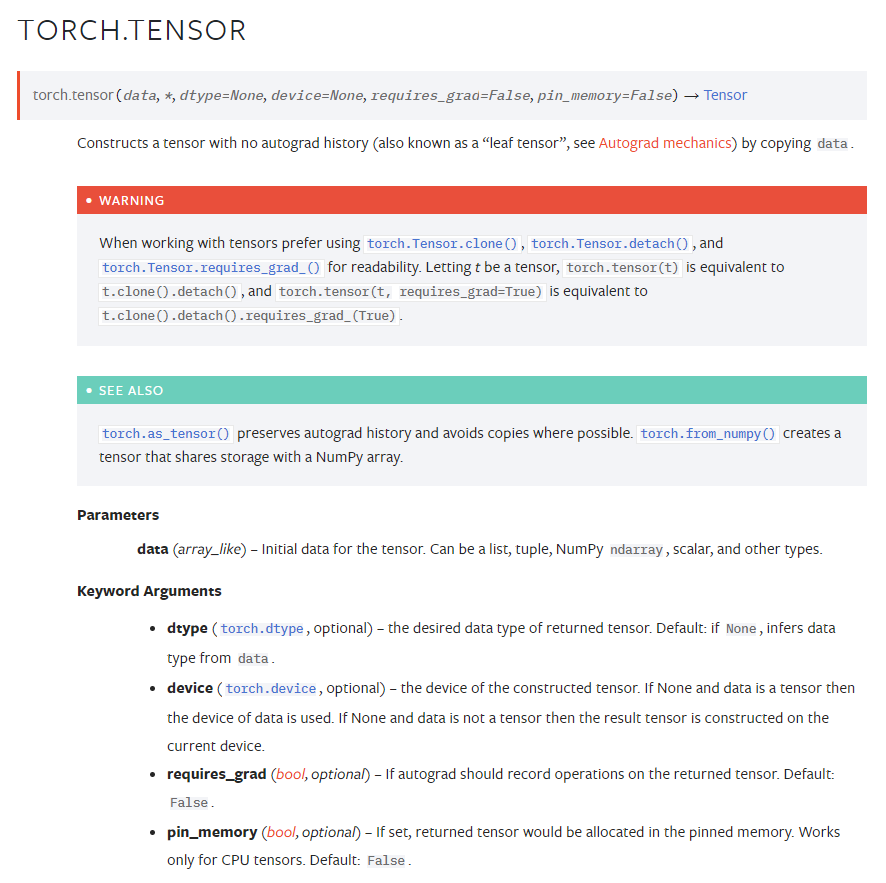

In [3]:
a = torch.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])

In [5]:
?torch.tensor

In [6]:
a.shape

torch.Size([3, 2])

In [ ]:
torch.tensor([0, 1])  # Type inference on data

tensor([0, 1])

In [ ]:
torch.tensor([[0.11111, 0.222222, 0.3333333]],
             dtype=torch.float64,
             device=torch.device('cuda:0'))  # creates a double tensor on a CUDA device

tensor([[0.1111, 0.2222, 0.3333]], device='cuda:0', dtype=torch.float64)

In [ ]:
torch.tensor(3.14159)  # Create a zero-dimensional (scalar) tensor

tensor(3.1416)

In [ ]:
torch.tensor([])  # Create an empty tensor (of size (0,))

tensor([])

In [ ]:
# Crear un tensor de números enteros de 1D
tensor_2d_a = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Crear un tensor de números flotantes de 2D (matriz)
tensor_2d = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Realizar operaciones tensoriales
resultado = tensor_2d_a + tensor_2d

# Obtener la forma y el tipo de datos del tensor
print("Forma del tensor:", resultado.shape)
print("Tipo de datos del tensor:", resultado.dtype)

# Mover el tensor a la GPU (si está disponible)
if torch.cuda.is_available():
    resultado = resultado.cuda()


Forma del tensor: torch.Size([2, 2])
Tipo de datos del tensor: torch.float32


In [ ]:
resultado

tensor([[2., 4.],
        [6., 8.]], device='cuda:0')

In [ ]:
tensor_2d_a

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
tensor_2d

tensor([[1., 2.],
        [3., 4.]])

## Operaciones básicas sobre tensores

### Operaciones matemáticas elementales
- `torch.add()`: Suma dos tensores elemento por elemento.
- `torch.sub()`: Resta dos tensores elemento por elemento.
- `torch.mul()`: Multiplica dos tensores elemento por elemento.
- `torch.div()`: Divide dos tensores elemento por elemento.
- `torch.pow()`: Eleva un tensor a una potencia especificada.
- `torch.sqrt()`: Calcula la raíz cuadrada de un tensor.
- `torch.exp()`: Calcula la exponencial de un tensor.
- `torch.log()`: Calcula el logaritmo natural de un tensor.

### Reducción de tensores
- `torch.sum()`: Calcula la suma de todos los elementos en un tensor.
- `torch.mean()`: Calcula la media de los elementos en un tensor.
- `torch.max()`: Encuentra el valor máximo en un tensor.
- `torch.min()`: Encuentra el valor mínimo en un tensor.

### Operaciones de álgebra lineal
- `torch.mm()`: Realiza la multiplicación matricial de dos tensores.
- `torch.matmul()`: Realiza la multiplicación de matrices o de tensores multidimensionales.
- `torch.inverse()`: Calcula la matriz inversa de una matriz cuadrada.
- `torch.det()`: Calcula el determinante de una matriz cuadrada.
- `torch.svd()`: Realiza la descomposición de valores singulares (SVD) de una matriz.

### Manipulación de tensores
- `torch.reshape()`: Cambia la forma (shape) de un tensor.
- `torch.transpose()`: Transpone un tensor intercambiando sus dimensiones.
- `torch.cat()`: Concatena varios tensores a lo largo de una dimensión especificada.
- `torch.split()`: Divide un tensor en trozos a lo largo de una dimensión especificada.
- `torch.index_select()`: Selecciona elementos de un tensor según un índice especificado.

### Operaciones booleanas y lógicas
- `torch.eq()`: Compara elementos de dos tensores y devuelve un tensor booleano de igualdad.
- `torch.gt()`, `torch.lt()`, `torch.ge()`, `torch.le()`: Realiza comparaciones de desigualdad elemento por elemento.

Estas son solo algunas de las muchas operaciones disponibles en PyTorch. Consulta la documentación oficial de PyTorch para obtener información más detallada sobre estas operaciones y muchas otras.


### Flatten

In [ ]:
import torch

# Crear un tensor de números enteros de 1D
tensor_1d = torch.tensor([1, 2, 3, 4])

# Crear un tensor de números flotantes de 2D (matriz)
tensor_2d = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Realizar operaciones tensoriales
resultado = tensor_1d + tensor_2d

# Obtener la forma y el tipo de datos del tensor
print("Forma del tensor:", resultado.shape)
print("Tipo de datos del tensor:", resultado.dtype)

# Mover el tensor a la GPU (si está disponible)
if torch.cuda.is_available():
    resultado = resultado.cuda()


RuntimeError: The size of tensor a (4) must match the size of tensor b (2) at non-singleton dimension 1

In [ ]:
import torch

# Crear un tensor de números enteros de 1D
tensor_1d = torch.tensor([1, 2, 3, 4])

# Crear un tensor de números flotantes de 2D (matriz)
tensor_2d = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Realizar operaciones tensoriales
resultado = tensor_1d + tensor_2d.flatten()

# Obtener la forma y el tipo de datos del tensor
print("Forma del tensor:", resultado.shape)
print("Tipo de datos del tensor:", resultado.dtype)

# Mover el tensor a la GPU (si está disponible)
if torch.cuda.is_available():
    resultado = resultado.cuda()


Forma del tensor: torch.Size([4])
Tipo de datos del tensor: torch.float32


In [ ]:
resultado

tensor([2., 4., 6., 8.], device='cuda:0')

## Capa lineal

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [10]:
f = nn.Linear(2, 6)
input = torch.randn(20, 2)
output = f(input)
print(output.size())

torch.Size([20, 6])


In [37]:
output

tensor([[-0.2464, -0.4713,  0.3572, -0.2901, -0.4862, -0.7631],
        [-0.6438,  0.3340,  1.3214, -0.6379,  0.0191, -1.9616],
        [ 0.3907,  0.4292, -0.0732,  0.4544, -1.0507, -0.9863],
        [ 0.9115,  0.4166, -0.8061,  0.9992, -1.5960, -0.4360],
        [-0.7576, -1.4319,  0.5813, -0.9076, -0.0600, -0.3510],
        [-0.1993, -0.8598,  0.0936, -0.2737, -0.5790, -0.3342],
        [ 1.0526,  0.4186, -1.0019,  1.1472, -1.7431, -0.2923],
        [ 0.2542, -0.5726, -0.3927,  0.2260, -1.0204, -0.1469],
        [ 0.0857, -0.7695, -0.2579,  0.0326, -0.8665, -0.1283],
        [-1.4319, -0.8997,  1.7928, -1.5691,  0.7039, -1.5683],
        [ 0.2031, -0.4127, -0.2400,  0.1861, -0.9491, -0.3562],
        [ 1.0823,  0.1389, -1.1857,  1.1545, -1.8055,  0.0122],
        [ 0.9394,  0.8292, -0.6349,  1.0635, -1.5789, -0.8111],
        [-0.2241, -0.1713,  0.4787, -0.2411, -0.4759, -1.0336],
        [ 0.3594, -0.0161, -0.2562,  0.3837, -1.0679, -0.5829],
        [-0.6336, -1.4107,  0.4191, -0.7

In [11]:
f

Linear(in_features=2, out_features=6, bias=True)

Matriz A

In [12]:
f.weight

Parameter containing:
tensor([[ 0.2147, -0.6031],
        [-0.2728, -0.6080],
        [-0.4383,  0.5318],
        [ 0.2017, -0.6839],
        [-0.2548,  0.5617],
        [ 0.4886, -0.0279]], requires_grad=True)

In [14]:
import numpy as np

In [16]:
A = np.array([[ 0.2147, -0.6031],
        [-0.2728, -0.6080],
        [-0.4383,  0.5318],
        [ 0.2017, -0.6839],
        [-0.2548,  0.5617],
        [ 0.4886, -0.0279]])

In [18]:
A.T

array([[ 0.2147, -0.2728, -0.4383,  0.2017, -0.2548,  0.4886],
       [-0.6031, -0.608 ,  0.5318, -0.6839,  0.5617, -0.0279]])

Datos de entrada x

In [19]:
input

tensor([[-0.1402,  0.1919],
        [-2.6055, -0.0266],
        [-0.6680, -1.0523],
        [ 0.4313, -1.5246],
        [ 0.7701,  1.3635],
        [ 0.7513,  0.4311],
        [ 0.7178, -1.6566],
        [ 1.0987, -0.1972],
        [ 1.1539,  0.1019],
        [-1.7077,  1.5998],
        [ 0.6666, -0.2663],
        [ 1.3510, -1.4805],
        [-0.3549, -1.8506],
        [-0.7074, -0.0469],
        [ 0.1778, -0.6994],
        [ 0.9823,  1.2335],
        [ 0.1381,  0.0110],
        [ 0.3475,  0.0051],
        [-0.2799,  0.4205],
        [ 1.7141, -1.7649]])

input

In [25]:
input

tensor([[-0.1402,  0.1919],
        [-2.6055, -0.0266],
        [-0.6680, -1.0523],
        [ 0.4313, -1.5246],
        [ 0.7701,  1.3635],
        [ 0.7513,  0.4311],
        [ 0.7178, -1.6566],
        [ 1.0987, -0.1972],
        [ 1.1539,  0.1019],
        [-1.7077,  1.5998],
        [ 0.6666, -0.2663],
        [ 1.3510, -1.4805],
        [-0.3549, -1.8506],
        [-0.7074, -0.0469],
        [ 0.1778, -0.6994],
        [ 0.9823,  1.2335],
        [ 0.1381,  0.0110],
        [ 0.3475,  0.0051],
        [-0.2799,  0.4205],
        [ 1.7141, -1.7649]])

In [26]:
x = np.array([[-0.1402,  0.1919],
        [-2.6055, -0.0266],
        [-0.6680, -1.0523],
        [ 0.4313, -1.5246],
        [ 0.7701,  1.3635],
        [ 0.7513,  0.4311],
        [ 0.7178, -1.6566],
        [ 1.0987, -0.1972],
        [ 1.1539,  0.1019],
        [-1.7077,  1.5998],
        [ 0.6666, -0.2663],
        [ 1.3510, -1.4805],
        [-0.3549, -1.8506],
        [-0.7074, -0.0469],
        [ 0.1778, -0.6994],
        [ 0.9823,  1.2335],
        [ 0.1381,  0.0110],
        [ 0.3475,  0.0051],
        [-0.2799,  0.4205],
        [ 1.7141, -1.7649]])

In [29]:
A.T.shape

(2, 6)

In [30]:
x.shape

(20, 2)

In [31]:
x * A

ValueError: operands could not be broadcast together with shapes (20,2) (6,2) 

In [32]:
A * x.T

ValueError: operands could not be broadcast together with shapes (6,2) (2,20) 

In [33]:
x.T * A

ValueError: operands could not be broadcast together with shapes (2,20) (6,2) 

In [35]:
A @ x.T

array([[-0.14583583, -0.54335839,  0.49122253,  1.01208637, -0.65698638,
        -0.0986923 ,  1.15320712,  0.35482221,  0.18628644, -1.33148257,
         0.30372455,  1.18294925,  1.03989983, -0.12359339,  0.4599818 ,
        -0.53302404,  0.02301597,  0.07153244, -0.31369808,  1.43242846],
       [-0.07842864,  0.7269532 ,  0.8220288 ,  0.80929816, -1.03909128,
        -0.46706344,  0.81139696, -0.17982776, -0.37673912, -0.50681784,
        -0.01993808,  0.5315912 ,  1.22198152,  0.22149392,  0.37673136,
        -1.01793944, -0.04436168, -0.0978988 , -0.17930728,  0.60545272],
       [ 0.16350208,  1.12784477, -0.26682874, -0.99982107,  0.38757447,
        -0.10003581, -1.19559162, -0.58643117, -0.45156395,  1.59925855,
        -0.43378912, -1.3794732 , -0.82859641,  0.285112  , -0.44987066,
         0.22543321, -0.05467943, -0.14959707,  0.34630207, -1.68986385],
       [-0.15951875, -0.50733761,  0.58493237,  1.12966715, -0.77716848,
        -0.14329208,  1.277729  ,  0.35647287,  

In [36]:
f.bias.shape


torch.Size([6])

In [53]:
f.bias

Parameter containing:
tensor([-0.1006, -0.3928,  0.1937, -0.1305, -0.6297, -0.6893],
       requires_grad=True)

In [55]:
b = np.array([-0.1006, -0.3928,  0.1937, -0.1305, -0.6297, -0.6893])

In [40]:
b = f.bias.detach().numpy()

In [41]:
b

array([-0.10055791, -0.39280736,  0.19368061, -0.13050316, -0.6297329 ,
       -0.68927294], dtype=float32)

In [43]:
b.shape

(6,)

## Haciendo la operación en numpy

In [47]:
x.shape

(20, 2)

In [48]:
A.shape

(6, 2)

In [49]:
b.shape

(6,)

Consistencia en las dimensiones

In [50]:
A = A.T

In [52]:
x @ A + b

array([[-0.24639374, -0.471236  ,  0.35718269, -0.29002191, -0.48621972,
        -0.76312867],
       [-0.6439163 ,  0.33414584,  1.32152538, -0.63784077,  0.01920727,
        -1.9615781 ],
       [ 0.39066462,  0.42922144, -0.07314813,  0.45442921, -1.05060342,
        -0.98629857],
       [ 0.91152846,  0.4164908 , -0.80614046,  0.99916399, -1.59599597,
        -0.43600342],
       [-0.75754429, -1.43189864,  0.58125508, -0.90767164, -0.06007644,
        -0.35104373],
       [-0.19925021, -0.8598708 ,  0.0936448 , -0.27379524, -0.57901528,
        -0.33421545],
       [ 1.05264921,  0.4185896 , -1.00191101,  1.14722584, -1.74314057,
        -0.29233672],
       [ 0.2542643 , -0.57263512, -0.39275056,  0.22596971, -1.02044891,
        -0.14694624],
       [ 0.08572853, -0.76954648, -0.25788334,  0.03254906, -0.8665094 ,
        -0.12832041],
       [-1.43204048, -0.8996252 ,  1.79293916, -1.56904947,  0.70399671,
        -1.56828958],
       [ 0.20316664, -0.41274544, -0.24010851,  0.

# 1 Tarea:

- Reproducir operaciones en numpy

La primera función es [nn.linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

In [ ]:
output

tensor([[-0.4034],
        [-0.7146],
        [-0.9463],
        [ 0.0014],
        [-0.4501]], grad_fn=<AddmmBackward0>)

In [ ]:
input

tensor([[-0.2545, -0.1449],
        [-1.6228,  0.1209],
        [ 0.8263, -0.5515],
        [-1.6551, -0.1254],
        [ 0.5426,  0.5314]])

In [ ]:
for x in input:
  print(x.size())

torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])


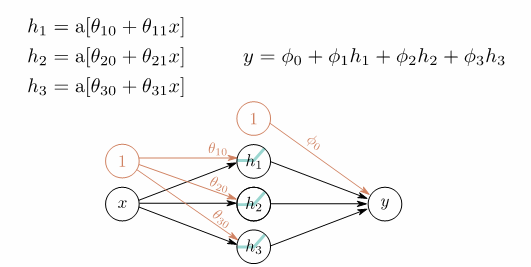

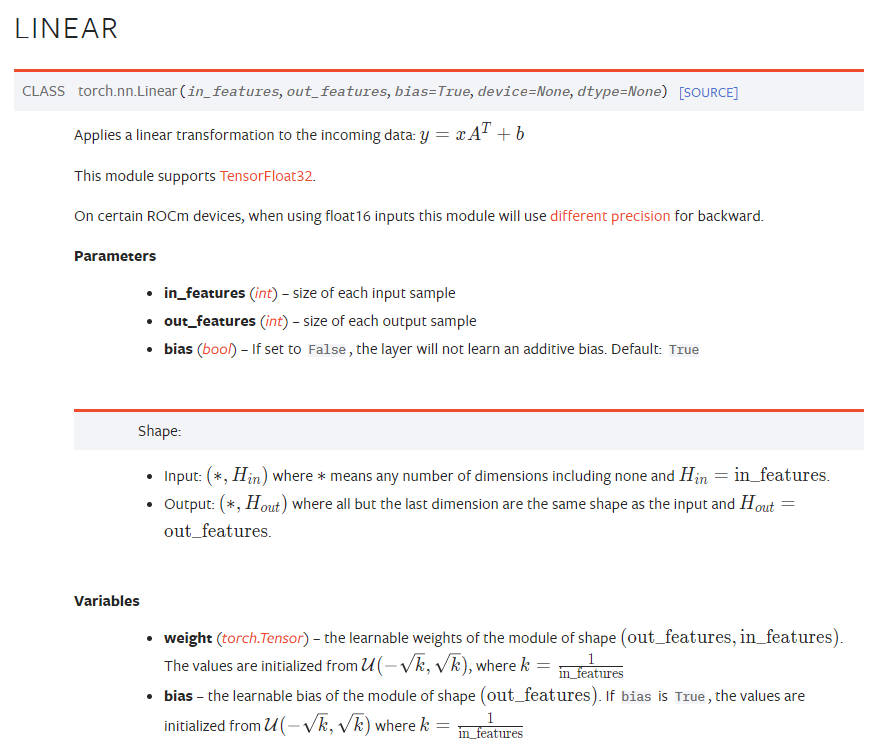

In [ ]:
f.weight

Parameter containing:
tensor([[0.5976, 0.0572]], requires_grad=True)

### Entendiendo las dimensiones

Qué valores puede tomar a, b, c y d

In [ ]:
a, b, c, d = 0, 0, 0, 0
f = nn.Linear(a, b)
input = torch.randn(c, d)
output = f(input)

# Redes neuronales en PyTorch

La lista de [funcionalidades de redes neuronales](https://pytorch.org/docs/stable/nn.html) así como su documentación es el mejor lugar para aprender a usar PyTorch

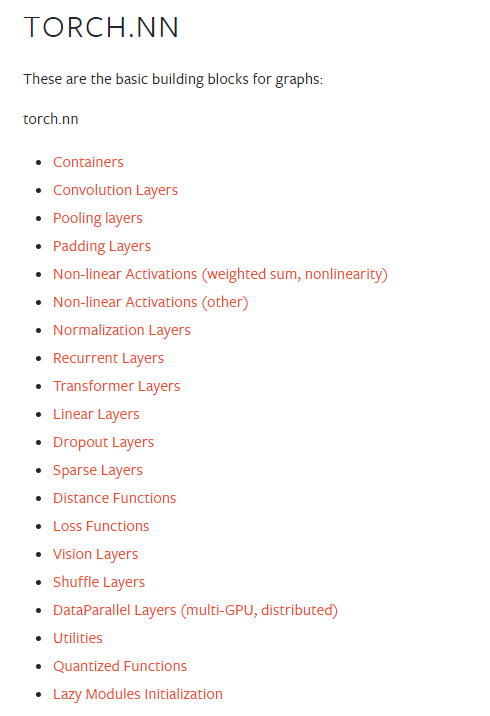

## Funciones de activación

1. **[ReLU (Rectified Linear Unit):](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)** `nn.ReLU()`
   - La función de activación ReLU apaga todos los valores negativos en el tensor y mantiene los valores positivos sin cambios.

2. **[Sigmoid:](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)** `nn.Sigmoid()`
   - La función de activación sigmoidal aplasta los valores de entrada en el rango (0, 1), lo que la hace útil para problemas de clasificación binaria.

3. **Tanh (Tangente hiperbólica):** `nn.Tanh()`
   - La función de activación tangente hiperbólica aplasta los valores de entrada en el rango (-1, 1), y es similar a la sigmoidal pero con una salida centrada en cero.

4. **Softmax:** `nn.Softmax(dim=...)`
   - La función de activación softmax se utiliza típicamente en la capa de salida de una red neuronal para convertir un conjunto de valores en una distribución de probabilidad sobre clases. El argumento `dim` especifica la dimensión a lo largo de la cual se calcula el softmax.

5. **Leaky ReLU:** `nn.LeakyReLU(negative_slope=...)`
   - Similar a ReLU, pero permite que una pequeña pendiente negativa se propague a través de la red, lo que ayuda a prevenir el problema de la "neurona muerta".

6. **ELU (Exponential Linear Unit):** `nn.ELU(alpha=...)`
   - La función ELU es una alternativa a ReLU que permite una pendiente negativa y evita el problema de las "neuronas muertas". El parámetro `alpha` controla la pendiente negativa.

7. **SELU (Scaled Exponential Linear Unit):** `nn.SELU()`
   - SELU es una función de activación que se basa en ELU y se ha demostrado que mejora el entrenamiento de redes neuronales profundas.

8. **Softplus:** `nn.Softplus()`
   - La función de activación Softplus es una versión suave y diferenciable de ReLU, que se utiliza en algunos modelos.

9. **Swish:** `nn.SiLU()`
   - La función de activación Swish es otra función suave y diferenciable que se ha propuesto como alternativa a ReLU.



###  **[ReLU (Rectified Linear Unit):](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)** `nn.ReLU()`

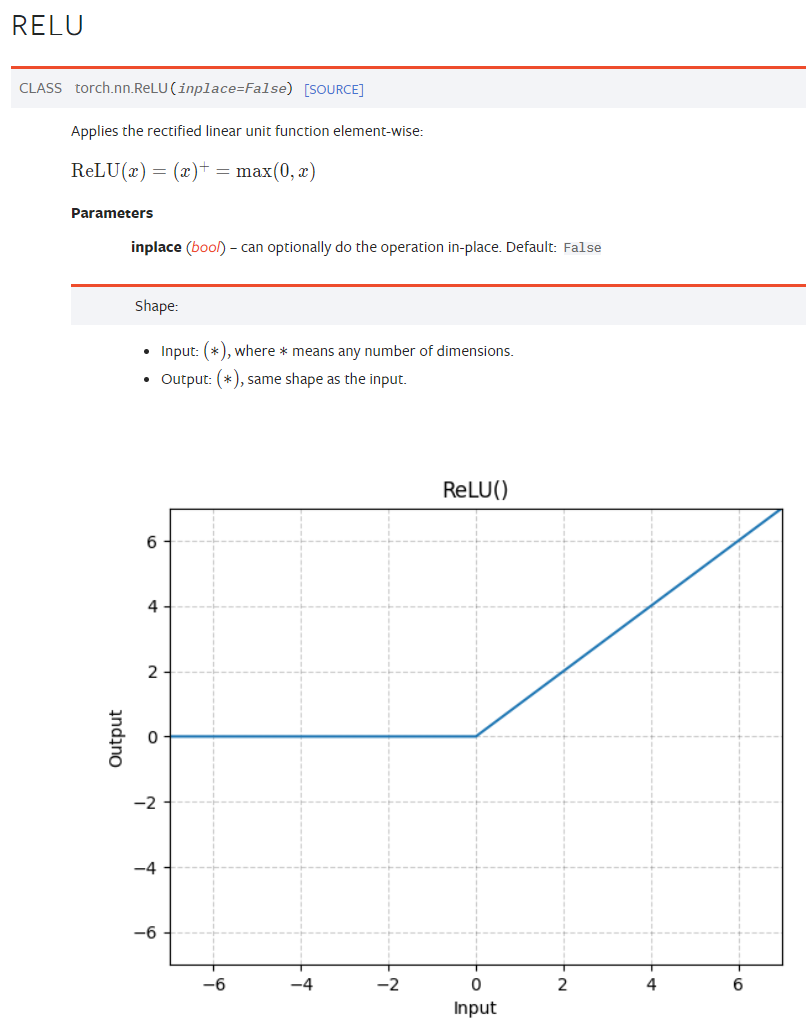

In [56]:
relu = nn.ReLU()

In [57]:
input = torch.randn(2)
input

tensor([-0.0245,  0.1985])

In [58]:
output = relu(input)
output

tensor([0.0000, 0.1985])

## **Contenedores:** Sequential

Un contenedor es una estructura que nos permite conectar elementos de PyTorch y habilitar funcionalidades importantes dentro de nuestras soluciones como:

1. Composición de funciones
1. Cálculo de derivadas

[Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential) será el contenedor por excelencia para definir nuestras redes neuronales

### Ejemplo de la clase

Recordemos el ejemplo de la clase

Identifiquemos juntos cómo podemos representar esta red neuronal en PyTorch

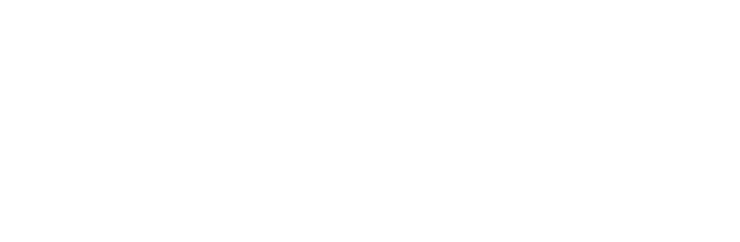

$$
\begin{aligned}
h_1 & =\mathrm{a}\left[\theta_{10}+\theta_{11} x\right] \\
h_2 & =\mathrm{a}\left[\theta_{20}+\theta_{21} x\right] \\
h_3 & =\mathrm{a}\left[\theta_{30}+\theta_{31} x\right]
\end{aligned}
$$

y la función estaba definida como

$$
y=\phi_0+\phi_1 h_1+\phi_2 h_2+\phi_3 h_3
$$

Cuya representación era

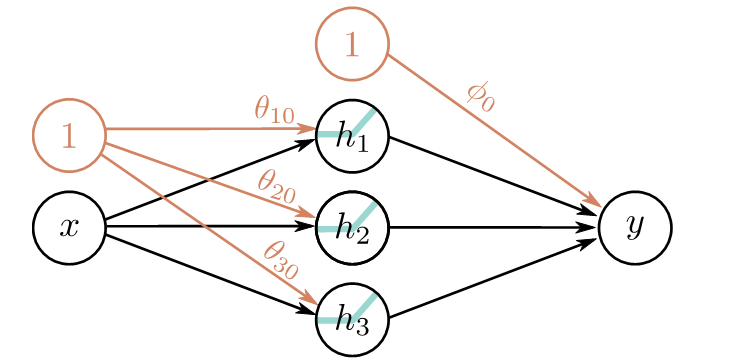

import torch.nn as nn

model = nn.Sequential(
    nn.Linear(1, 3))

In [33]:
import torch.nn as nn
import torch

model = nn.Sequential(
    nn.Linear(2, 3),
    nn.ReLU(),
    nn.Linear(3, 3)
    )

## Tarea

Intentar representar las operaciones de esa red en numpy

In [3]:
import torch.nn as nn
import torch

model = nn.Sequential(
    nn.Linear(1, 3),
    nn.ReLU(),
    nn.Linear(3, 1)
    )

In [23]:
model

Sequential(
  (0): Linear(in_features=1, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=1, bias=True)
)

In [24]:
model[0]

Linear(in_features=1, out_features=3, bias=True)

In [27]:
model[0].weight

Parameter containing:
tensor([[-0.7981],
        [-0.4594],
        [-0.7038]], requires_grad=True)

In [21]:
x = torch.tensor([9.0])

In [22]:
model(x)

tensor([-0.0846], grad_fn=<ViewBackward0>)

Si quisiéramos manejar entrada/salida usamos input() (python3) raw_input() en python 2

In [8]:
i = int(input())

7


In [9]:

i

7

### Solución: Usando Linear y ReLU

In [ ]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(1, 3),
    nn.ReLU(),
    nn.Linear(3, 3),
    nn.ReLU(),
    nn.Linear(3, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.ReLU(),
    nn.Linear(3, 1),
    nn.ReLU(),
    nn.Linear(3, 1),
    nn.ReLU(),
    nn.Linear(3, 1),
    nn.ReLU(),
    nn.Linear(3, 1)
)


In [ ]:
model

Sequential(
  (0): Linear(in_features=1, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=3, bias=True)
  (3): ReLU()
  (4): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
input = torch.randn(10, 1)
output = model(input)

In [ ]:
input

tensor([[-1.2039],
        [ 0.8871],
        [ 1.1198],
        [-0.1356],
        [ 0.4680],
        [-0.7842],
        [-0.5782],
        [-0.7827],
        [-2.6024],
        [ 0.3443]])

In [ ]:
output

tensor([[0.5687],
        [0.7069],
        [0.7793],
        [0.5687],
        [0.5687],
        [0.5687],
        [0.5687],
        [0.5687],
        [0.6003],
        [0.8946]], grad_fn=<AddmmBackward0>)

Veamos cada componente del modelo

Entrada

In [ ]:
model[0]

Linear(in_features=1, out_features=3, bias=True)

In [ ]:
model[0].weight

Parameter containing:
tensor([[ 0.8330],
        [-0.7473],
        [ 0.1766]], requires_grad=True)

In [ ]:
model[0].bias

Parameter containing:
tensor([-0.3512, -0.9805, -0.4119], requires_grad=True)

ReLU

In [ ]:
model[1]

ReLU()

Salida

In [ ]:
model[2]

Linear(in_features=3, out_features=1, bias=True)

In [ ]:
model[2].weight

Parameter containing:
tensor([[ 0.5163,  0.1935, -0.0904]], requires_grad=True)

In [ ]:
model[2].bias

Parameter containing:
tensor([0.5687], requires_grad=True)

In [ ]:
from torch import matmul
from torch import relu

### Intentemos llegar a los cálculos

### Solución

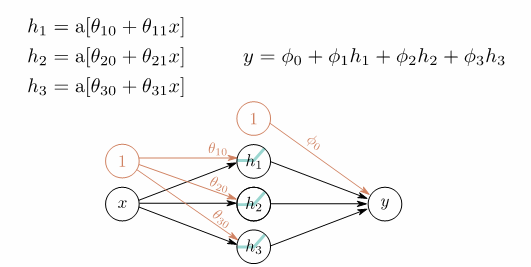

In [ ]:
matmul(input, model[0].weight.T) + model[0].bias

tensor([[-0.2748, -1.0490, -0.3957],
        [-2.2404,  0.7145, -0.8125],
        [ 0.4079, -1.6615, -0.2510],
        [-0.8638, -0.5205, -0.5206],
        [-1.1181, -0.2924, -0.5745],
        [-0.9841, -0.4126, -0.5461],
        [-0.1783, -1.1355, -0.3753],
        [-0.4094, -0.9282, -0.4243],
        [ 0.0613, -1.3505, -0.3245],
        [ 0.6314, -1.8619, -0.2036]], grad_fn=<AddBackward0>)

In [ ]:
relu(matmul(input, model[0].weight.T) + model[0].bias)

tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.7145, 0.0000],
        [0.4079, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0613, 0.0000, 0.0000],
        [0.6314, 0.0000, 0.0000]], grad_fn=<ReluBackward0>)

In [ ]:
matmul(relu(matmul(input, model[0].weight.T) + model[0].bias), model[2].weight.T) + model[2].bias

tensor([[0.5687],
        [0.7069],
        [0.7793],
        [0.5687],
        [0.5687],
        [0.5687],
        [0.5687],
        [0.5687],
        [0.6003],
        [0.8946]], grad_fn=<AddBackward0>)

De hecho,

# Estructurado: Ejemplo de clase

In [ ]:
import torch
import torch.nn as nn

# Define un modelo neuronal simple con activación ReLU
class ModeloSimple(nn.Module):
    def __init__(
        self,
        VARIABLES_ENTRADA,
        VARIABLES_SALIDA,
        CAPAS_OCULTAS
    ):
        super(ModeloSimple, self).__init__()
        self.fc1 = nn.Linear(
            in_features=None,
            out_features=None
        )
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(
            in_features=None,
            out_features=None
        )

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)  # Aplica la función de activación ReLU
        x = self.fc2(x)
        return x

In [ ]:
# Crea una instancia del modelo
modelo = ModeloSimple(64, 2, 4)

# Ejemplo de entrada
datos_entrada = torch.randn(1, 64)  # Ajusta la forma de entrada según sea necesario

# Pase hacia adelante
salida = modelo(datos_entrada)
print(salida)


TypeError: empty() received an invalid combination of arguments - got (tuple, dtype=NoneType, device=NoneType), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.memory_format memory_format, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, torch.memory_format memory_format, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


## Solución

In [ ]:
import torch
import torch.nn as nn

# Define un modelo neuronal simple con activación ReLU
class ModeloSimple(nn.Module):
    def __init__(
        self,
        VARIABLES_ENTRADA,
        VARIABLES_SALIDA,
        CAPAS_OCULTAS
    ):
        super(ModeloSimple, self).__init__()
        self.fc1 = nn.Linear(
            in_features=VARIABLES_ENTRADA,
            out_features=CAPAS_OCULTAS
        )
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(
            in_features=CAPAS_OCULTAS,
            out_features=VARIABLES_SALIDA
        )

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)  # Aplica la función de activación ReLU
        x = self.fc2(x)
        return x



In [ ]:
# Crea una instancia del modelo
modelo = ModeloSimple(64, 2, 4)

# Ejemplo de entrada
datos_entrada = torch.randn(1, 64)  # Ajusta la forma de entrada según sea necesario

# Pase hacia adelante
salida = modelo(datos_entrada)
print(salida)


tensor([[ 0.7747, -0.0865]], grad_fn=<AddmmBackward0>)


# **Funciones custom:** Definiendo un Perceptron

Es posible definir pasos en nuestra red con funciones propias

El primer modelo mátematico usando neuronas fue el denominado Threshold Logic Unit, con entradas booleanas:
$$
f(x)=\mathbf{1}_{\left\{ \sum_i w_i x_i+b \geq 0\right\}} .
$$

Puede implementar
$$
\begin{aligned}
\operatorname{or}(u, v) & =\mathbf{1}_{\{u+v-0.5 \geq 0\}} & (w=1, b=-0.5) \\
\text { and }(u, v) & =\mathbf{1}_{\{u+v-1.5 \geq 0\}} & (w=1, b=-1.5) \\
\operatorname{not}(u) & =\mathbf{1}_{\{-u+0.5 \geq 0\}} & (w=-1, b=0.5)
\end{aligned}
$$

### Consecuencia?



**Cualquier** función booleana compuesta por esas unidades puede ser representada usando la TLU

(McCulloch and Pitts,1943)

### El perceptron

El perceptron es bastante parecido
$$
f(x)=\left\{\begin{array}{lrr}
1 & \text { if } & \sum_i w_i x_i+b \geq 0 \\
0 & \text { en otro caso }
\end{array}\right.
$$
pero las entradas están en los reales y los pesos varían (Rosenblatt, 1957).

Para simplificar cálculos, asumimos la función como $\pm 1$. Sea
$$
\sigma(x)=\left\{\begin{aligned}
1 & \text { if } x \geq 0 \\
-1 & \text { en otro caso }
\end{aligned}\right.
$$

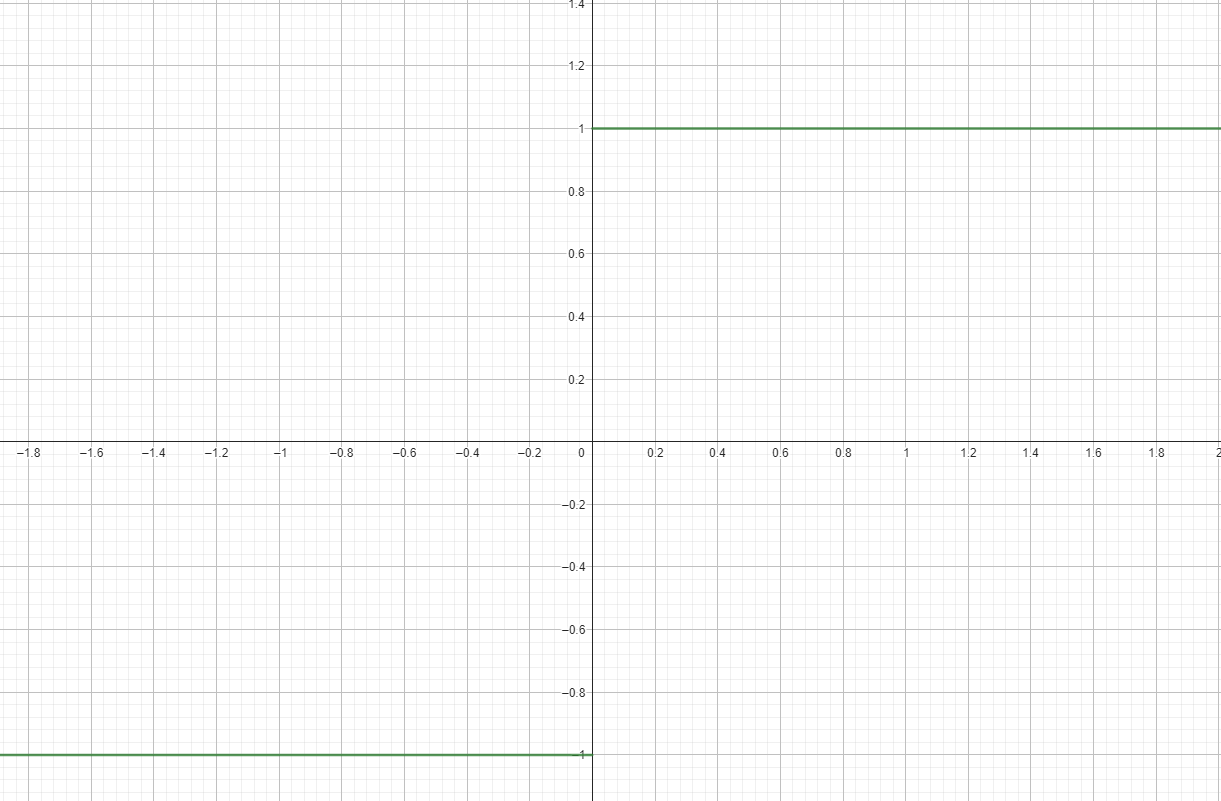

La regla de clasificación para perceptron entonces es:
$$
f(x)=\sigma(w \cdot x+b)
$$

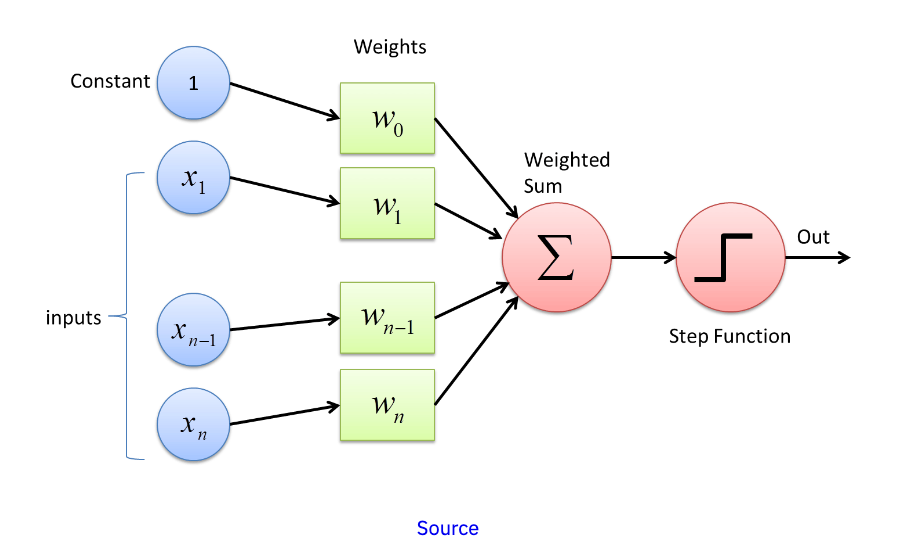

### Función step

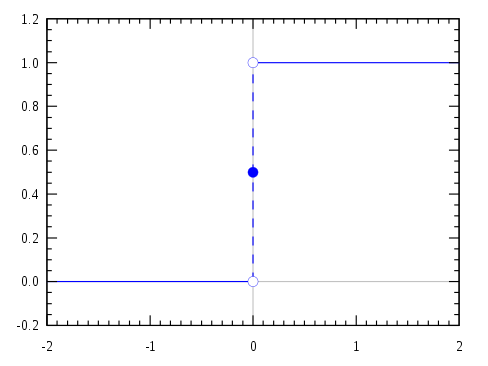

Podemos implementarla usando la función [heaviside
](https://pytorch.org/docs/stable/generated/torch.heaviside.html)

$$
\text { heaviside }(\text { input }, \text { values })= \begin{cases}0, & \text { if input }<0 \\ \text { values }, & \text { if input }==0 \\ 1, & \text { if input }>0\end{cases}
$$

Parameters
 1. input (Tensor) – the input tensor.
 1. values (Tensor) – The values to use where input is zero.

Keyword Arguments
 1. out (Tensor, optional) – the output tensor.

Cómo podríamos implementar esta función de activación?

In [ ]:
class NuestraActivation(nn.Module):
    def __init__(self, values):
        # inicializar método
        super(NuestraActivation, self).__init__()

        # Posibles parámetros
        self.values = values

    # Definición de la función f(x, values)
    def forward(self, x):
        f = None
        return f(x, self.values)

### Solución

In [ ]:
class HeavisideActivation(nn.Module):
    def __init__(self, values):
        super(HeavisideActivation, self).__init__()
        self.values = values

    def forward(self, x):
        return heaviside(x, self.values)


In [ ]:
from collections import OrderedDict
import torch.nn as nn
from torch import heaviside

perceptron = nn.Sequential(OrderedDict([
    ('capa_densa_1', nn.Linear(5, 3)),
    ('salida', HeavisideActivation(values=torch.tensor([0.5])) )
]))

In [ ]:
perceptron

Sequential(
  (capa_densa_1): Linear(in_features=5, out_features=3, bias=True)
  (salida): HeavisideActivation()
)

In [ ]:
input = torch.randn(5, 5)
output = perceptron(input)

In [ ]:
output

tensor([[0., 0., 1.],
        [1., 1., 0.],
        [1., 1., 0.],
        [0., 1., 1.],
        [0., 0., 1.]], grad_fn=<NotImplemented>)

## Definiendo un MLP (Perceptron de Multiples Capas)





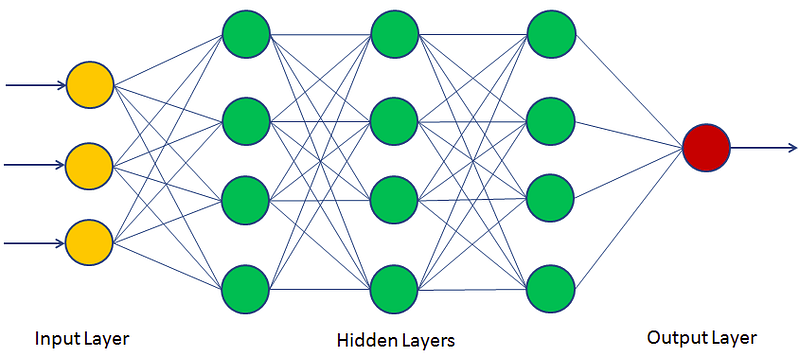

### Solución

In [ ]:
# Tarea: Modificar el código para que sea un MLP
# En base a la imagen anterior

from collections import OrderedDict
import torch.nn as nn

model = nn.Sequential(OrderedDict([
    ('capa_densa_1', nn.Linear(5, 3)),
    ('activacion_1', nn.ReLU()),
    ('capa_densa_2', nn.Linear(3, 5)),
    ('activacion_2', nn.ReLU()),
    ('salida', nn.Linear(5, 2))
]))

In [ ]:
input = torch.randn(5, 5)
output = model(input)

In [ ]:
output

tensor([[-0.0711,  0.3061],
        [-0.0795,  0.2738],
        [-0.0507,  0.2608],
        [-0.0723,  0.3108],
        [-0.0824,  0.2956]], grad_fn=<AddmmBackward0>)

In [ ]:
print(model)

Sequential(
  (capa_densa_1): Linear(in_features=5, out_features=3, bias=True)
  (activacion_1): ReLU()
  (capa_densa_2): Linear(in_features=3, out_features=5, bias=True)
  (activacion_2): ReLU()
  (salida): Linear(in_features=5, out_features=2, bias=True)
  (a(salida)): ReLU()
)


# Ver red

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=82e905c40cac3da69fed4e7ba28d7bf6f82f1c3614d4ec45f3f5f6d1004ae113
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
import torchviz

In [ ]:
from torchviz import make_dot

make_dot(output, params=dict(list(model.named_parameters()))).render("rnn_torchviz", format="png")

'rnn_torchviz.png'

# Entrenando la red neuronal

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
import torch
from torch.utils.data import DataLoader, TensorDataset

# Cargar el conjunto de datos de cáncer de mama
data = load_breast_cancer()
X = data.data
y = data.target

# Convertir los datos a tensores de PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

In [ ]:
y

In [ ]:
# Parámetros de la validación cruzada
num_splits = 5  # Número de divisiones (folds)
skf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

In [ ]:

# Listas para almacenar resultados de validación cruzada
accuracy_list = []


Si quieren mejorar el output usen tqdm

In [ ]:
# Agregar comentario
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Agregar comentario
    batch_size = 64 # Agregar comentario
    train_dataset = TensorDataset(X_train, y_train)
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataset = TensorDataset(X_val, y_val)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

    # Agregar comentario
    modelo = ModeloSimple(
        VARIABLES_ENTRADA=X_train.shape[1],
        VARIABLES_SALIDA=2,
        CAPAS_OCULTAS=10
    )

    # Agregar comentario
    optimizer = torch.optim.Adam(modelo.parameters(), lr=0.001)
    criterion = torch.nn.CrossEntropyLoss()

    # Agregar comentario
    num_epochs = 10
    for epoch in range(num_epochs):
        # Agregar comentario
        modelo.train(True)
        total_loss = 0.0
        for inputs, labels in train_dataloader:
            # Agregar comentario
            optimizer.zero_grad()

            # Agregar comentario
            outputs = modelo(inputs)

            # Agregar comentario
            loss = criterion(outputs, labels)

            # Agregar comentario
            loss.backward()

            # Agregar comentario
            optimizer.step()

            # Agregar comentario
            total_loss += loss.item()

    # Agregar comentario
    modelo.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = modelo(inputs)
            # Agregar comentario
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            # Agregar comentario
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    accuracy_list.append(accuracy)

    # Agregar comentario
    print(f'Época {epoch + 1}/{num_epochs}, Pérdida de Entrenamiento: {total_loss:.4f}, Precisión en Validación: {accuracy * 100:.2f}%')


# Agregar comentario
average_accuracy = np.mean(accuracy_list)
print(f"Precision promedio en validación cruzada de {num_splits} divisiones: {average_accuracy * 100:.2f}%")


Época 10/10, Pérdida de Entrenamiento: 7.1863, Precisión en Validación: 51.75%
Época 10/10, Pérdida de Entrenamiento: 3.3494, Precisión en Validación: 84.21%
Época 10/10, Pérdida de Entrenamiento: 2.0555, Precisión en Validación: 83.33%
Época 10/10, Pérdida de Entrenamiento: 2.3243, Precisión en Validación: 91.23%
Época 10/10, Pérdida de Entrenamiento: 2.7498, Precisión en Validación: 89.38%
Precision promedio en validación cruzada de 5 divisiones: 77.23%


# Solución no abrir

In [ ]:
# componente de validación cruzada
# Todas las instancias provienen de la misma distro, son independientes
# En el caso de usar series de tiempo, skf.
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Creamos los dataloader sea para entrenamiento como para prueba en
    # el fold
    batch_size = 64 # Batch size
    train_dataset = TensorDataset(X_train, y_train)
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataset = TensorDataset(X_val, y_val)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

    # Crea la instancia de nuestro modelo definido anteriormente
    modelo = ModeloSimple(
        VARIABLES_ENTRADA=X_train.shape[1], #
        VARIABLES_SALIDA=2,
        CAPAS_OCULTAS=10
    )

    # Definimos tanto el algoritmo optimizador como el criterio
    # de pérdida (función de pérdida)
    optimizer = torch.optim.Adam(modelo.parameters(), lr=0.001)
    criterion = torch.nn.CrossEntropyLoss()

    # Entrenamiento
    num_epochs = 10
    for epoch in range(num_epochs):
        # "Descongelamos" los pesos del modelo
        # Podemos determinar específicamente la época del modelo
        # Tener distintos modelos y modificar el entrenamiento
        # Eficiencia y manejo de recursos
        modelo.train(True)
        total_loss = 0.0
        for inputs, labels in train_dataloader:
            # Optimizar el gradiente
            #
            optimizer.zero_grad()

            # Hacemos prediccion
            outputs = modelo(inputs)

            # Calculamos la función de pérdida
            loss = criterion(outputs, labels)

            # Ajustamos el gradiente
            loss.backward()

            # Método iterativo
            # La actualización del gradiente
            optimizer.step()

            # Alamacenamos la función de pérdida
            total_loss += loss.item()

    # Evaluación en el conjunto de validación
    modelo.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = modelo(inputs)
            print(outputs)
            predicted, _ = torch.max(outputs.data, 1)
            print(predicted)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    accuracy_list.append(accuracy)

    # Imprimir información por época
    print(f'Época {epoch + 1}/{num_epochs}, Pérdida de Entrenamiento: {total_loss:.4f}, Precisión en Validación: {accuracy * 100:.2f}%')


# Calcular el promedio de las precisiones obtenidas en cada división de validación cruzada
average_accuracy = np.mean(accuracy_list)
print(f"Precision promedio en validación cruzada de {num_splits} divisiones: {average_accuracy * 100:.2f}%")


tensor([[ 9.8203,  7.2184],
        [ 3.4821,  3.5969],
        [ 3.7381,  3.4959],
        [ 6.4084,  5.4504],
        [ 7.7983,  4.7743],
        [ 3.4049,  3.9531],
        [ 2.6385,  2.6206],
        [ 0.8305,  2.0098],
        [ 4.6995,  4.2980],
        [ 9.8403,  7.0869],
        [ 6.6735,  4.9800],
        [ 4.2512,  2.5911],
        [ 8.9397,  6.0565],
        [ 3.4194,  3.0337],
        [ 2.3041,  2.9480],
        [ 2.9437,  2.8207],
        [ 4.5446,  3.7940],
        [ 2.8435,  3.0716],
        [ 4.5724,  3.8148],
        [ 1.9395,  2.3218],
        [ 2.4993,  2.8185],
        [ 3.0112,  2.7938],
        [ 4.4237,  3.2995],
        [ 1.1995,  1.7696],
        [ 2.8099,  2.9978],
        [ 5.4180,  4.5757],
        [ 6.2205,  5.3318],
        [ 7.6737,  5.1740],
        [ 9.0366,  5.9876],
        [14.8996,  7.6833],
        [ 5.4987,  4.0824],
        [ 2.2848,  2.3032],
        [ 4.1955,  3.3078],
        [ 0.5766,  1.9876],
        [ 2.5239,  2.3044],
        [ 9.8089,  5